## Temperature Forecast Project 

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

## Temperature Forecast Project - predict the minimum temperature for the next day

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
min_temperature_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
min_temperature_df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Observation:
            1. Predict the minimum temperature for the next day is a continous data so this is a 
               Regression problem. 
            2. The target is 'Next_Tmin' - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Exploratory Data Analysis

In [3]:
min_temperature_df.shape

(7752, 25)

In [4]:
min_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
min_temperature_df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Drop Columns not needed

In [6]:
min_temperature_df.shape

(7752, 25)

In [7]:
min_temperature_df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
# 'station', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', and 'Next_Tmax' column not needed 
# for prediction of 'Next_Tmin'

min_temperature_df.drop(['station', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'Next_Tmax'], axis = 1, inplace = True)

In [9]:
min_temperature_df.shape

(7752, 20)

## Handle Null values

In [10]:
min_temperature_df.dtypes

Date                 object
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmin           float64
dtype: object

In [11]:
min_temperature_df.isna().sum()

Date                 2
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmin           27
dtype: int64

Observation:
            1. There are NULL values in many columns

In [12]:
min_temperature_df.columns

Index(['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmin'],
      dtype='object')

In [13]:
# Handle all features Null values - Object type

for i in min_temperature_df.columns:
    if min_temperature_df.dtypes[i] == 'object':
        min_temperature_df[i] = min_temperature_df[i].fillna(min_temperature_df[i].mode()[0])

In [14]:
min_temperature_df.isna().sum()

Date                 0
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmin           27
dtype: int64

In [15]:
# Handle all features Null values  - Float type

for i in min_temperature_df.columns:
    if min_temperature_df.dtypes[i] == 'float64':
        min_temperature_df[i] = min_temperature_df[i].fillna(min_temperature_df[i].mean())

In [16]:
min_temperature_df.isna().sum()

Date                0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmin           0
dtype: int64

Observation:
            1. Now no NULL values

## check for any blank records

In [17]:
for i in min_temperature_df.columns:
    print(min_temperature_df.loc[min_temperature_df[i] == ' '])

Empty DataFrame
Columns: [Date, Present_Tmin, LDAPS_RHmin, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin]
Index: []
Empty DataFrame
Columns: [Date, Present_Tmin, LDAPS_RHmin, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin]
Index: []
Empty DataFrame
Columns: [Date, Present_Tmin, LDAPS_RHmin, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin]
Index: []
Empty DataFrame
Columns: [Date, Present_Tmin, LDAPS_RHmin, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin]
Index: []
Empt

Observation:
            1. checked all 20 columns but none have any blank values

## check the duplicate values in rows

In [18]:
min_temperature_df.shape

(7752, 20)

In [19]:
min_temperature_df.duplicated().sum()

0

In [20]:
min_temperature_df.shape

(7752, 20)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column 

In [21]:
min_temperature_df.nunique().to_frame("No. of Unique Values")

No. of Unique Values
Date                               310
Present_Tmin                       156
LDAPS_RHmin                       7673
LDAPS_Tmin_lapse                  7676
LDAPS_WS                          7676
LDAPS_LH                          7676
LDAPS_CC1                         7570
LDAPS_CC2                         7583
LDAPS_CC3                         7600
LDAPS_CC4                         7525
LDAPS_PPT1                        2813
LDAPS_PPT2                        2511
LDAPS_PPT3                        2357
LDAPS_PPT4                        1919
lat                                 12
lon                                 25
DEM                                 25
Slope                               27
Solar radiation                   1575
Next_Tmin                          158

In [22]:
min_temperature_df.describe()

Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count   7752.000000  7752.000000       7752.000000  7752.000000  7752.000000   
mean      23.225059    56.759372         23.512589     7.097875    62.505019   
std        2.403036    14.596973          2.333973     2.173245    33.567001   
min       11.300000    19.794666         14.272646     2.882580   -13.603212   
25%       21.700000    46.046162         22.114651     5.686487    37.532764   
50%       23.400000    55.313244         23.735942     6.563068    57.310630   
75%       24.900000    67.038254         25.134000     8.007471    83.904586   
max       29.900000    98.524734         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.261185     0.256810     0.249148     0.253114     1.936331   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148321     0.142328     0.103100     0.082741     0.000000   
50%       0.320110     0.315667     0.265264     0.232354     0.000000   
75%       0.571696     0.554963     0.494007     0.497230     0.067593   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.754258     1.156174     1.200364     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.024276     0.009697     0.000693    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7752.000000  
mean     61.867972     1.257048      5341.502803    22.932220  
std      54.279780     1.370444       429.158867     2.483276  
min      12.370000     0.098475      4329.520508    11.300000  
25%      28.700000     0.271300      4999.018555    21.400000  
50%      45.716000     0.618000      5436.345215    23.100000  
75%      59.832400     1.767800      5728.316406    24.600000  
max     212.335000     5.178230      5992.895996    29.800000

Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers

## Date cannnot be object type - it should be datetime type, so convert

In [23]:
min_temperature_df.dtypes

Date                 object
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmin           float64
dtype: object

In [24]:
min_temperature_df.Date.min()

'01-07-2013'

In [25]:
min_temperature_df.Date.max()

'31-07-2017'

In [26]:
min_temperature_df['Date'] = pd.to_datetime(min_temperature_df.Date, format = "%d-%m-%Y")

In [27]:
min_temperature_df['Date'].dtype

dtype('<M8[ns]')

In [28]:
min_temperature_df.dtypes

Date                datetime64[ns]
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmin                  float64
dtype: object

In [29]:
min_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7752 non-null   datetime64[ns]
 1   Present_Tmin      7752 non-null   float64       
 2   LDAPS_RHmin       7752 non-null   float64       
 3   LDAPS_Tmin_lapse  7752 non-null   float64       
 4   LDAPS_WS          7752 non-null   float64       
 5   LDAPS_LH          7752 non-null   float64       
 6   LDAPS_CC1         7752 non-null   float64       
 7   LDAPS_CC2         7752 non-null   float64       
 8   LDAPS_CC3         7752 non-null   float64       
 9   LDAPS_CC4         7752 non-null   float64       
 10  LDAPS_PPT1        7752 non-null   float64       
 11  LDAPS_PPT2        7752 non-null   float64       
 12  LDAPS_PPT3        7752 non-null   float64       
 13  LDAPS_PPT4        7752 non-null   float64       
 14  lat               7752 n

In [30]:
min_temperature_df.head()

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0 2013-06-30          21.4    58.255688         23.006936  6.818887   
1 2013-06-30          21.6    52.263397         24.035009  5.691890   
2 2013-06-30          23.3    48.690479         24.565633  6.138224   
3 2013-06-30          23.4    58.239788         23.326177  5.650050   
4 2013-06-30          21.9    56.174095         23.486480  5.735004   

     LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
0   69.451805   0.233947   0.203896   0.161697   0.130928         0.0   
1   51.937448   0.225508   0.251771   0.159444   0.127727         0.0   
2   20.573050   0.209344   0.257469   0.204091   0.142125         0.0   
3   65.727144   0.216372   0.226002   0.161157   0.134249         0.0   
4  107.965535   0.151407   0.249995   0.178892   0.170021         0.0   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmin  
0      5992.895996       21.2  
1      5869.312500       22.5  
2      5863.555664       23.9  
3      5856.964844       24.3  
4      5859.552246       22.5

In [31]:
min_temperature_df.shape

(7752, 20)

## Data Visualization

In [32]:
# seperating numerical and categorical columns

cat_col = []
for i in min_temperature_df.dtypes.index:
    if min_temperature_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in min_temperature_df.dtypes.index:
    if min_temperature_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column []


Numerical Column ['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmin']


Observation:
            1. All the variables have numerical data and no categorical data

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.9      1
29.5      1
13.4      1
12.9      1
Name: Next_Tmin, Length: 158, dtype: int64


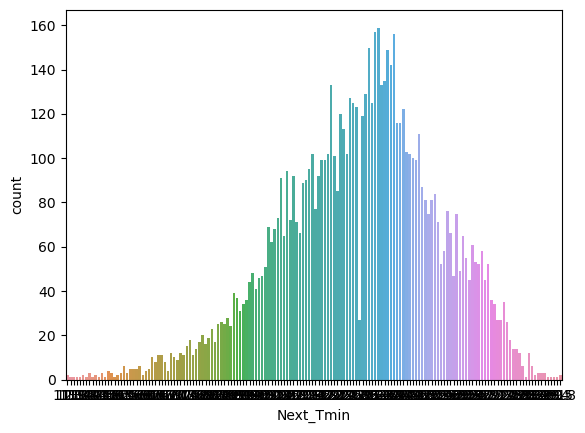

In [33]:
# Univariate Analysis

sns.countplot(x = 'Next_Tmin', data = min_temperature_df)
print(min_temperature_df.Next_Tmin.value_counts())

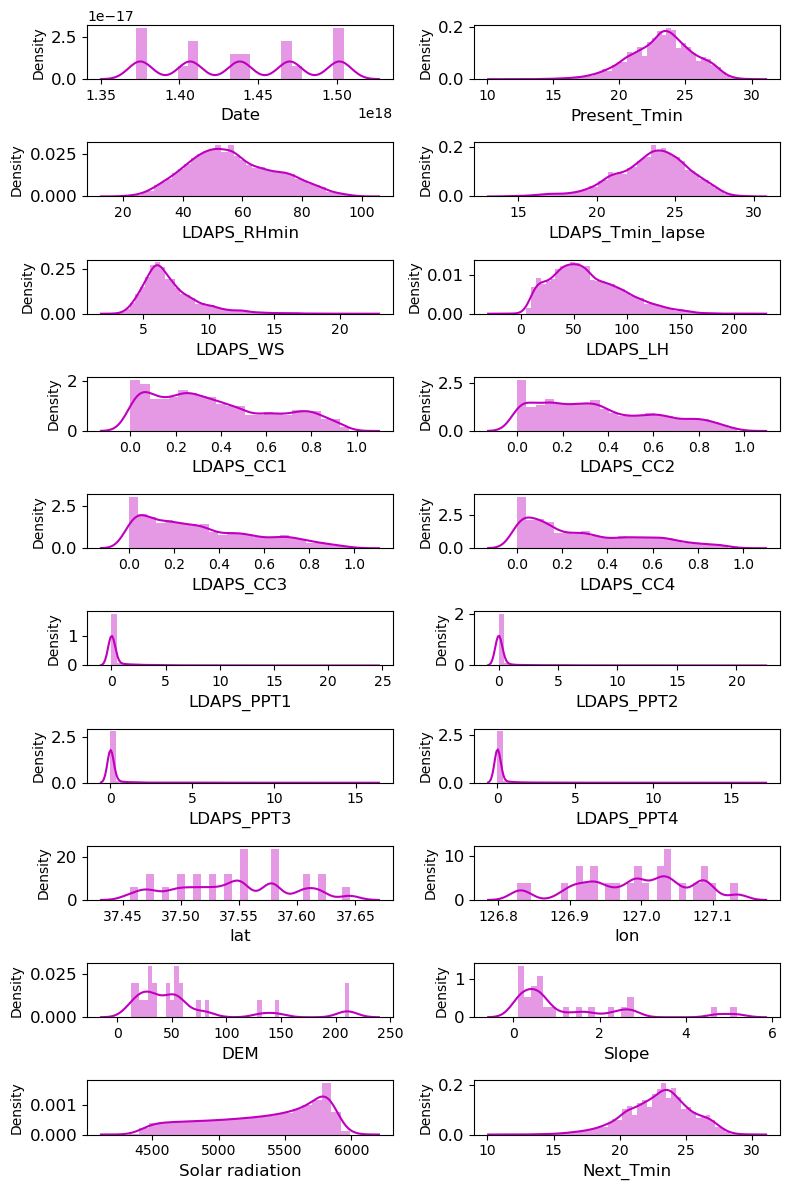

In [34]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(8,12))
p = 1
for i in num_col:
    if p <= 20:
        ax = plt.subplot(10, 2, p)
        sns.distplot(min_temperature_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Almost all continuous data are not well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

In [35]:
min_temperature_df.columns

Index(['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmin'],
      dtype='object')

In [36]:
min_temperature_df.shape

(7752, 20)

## Check for Multicollinearity

## Data Correlation find - whether we need all 20 columns

In [37]:
min_temperature_df.shape

(7752, 20)

In [38]:
# get coefficient of one variable with all the other variables

cor = min_temperature_df.corr()
cor

Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
Present_Tmin          1.000000     0.123143          0.762993 -0.034675   
LDAPS_RHmin           0.123143     1.000000          0.089476  0.294361   
LDAPS_Tmin_lapse      0.762993     0.089476          1.000000 -0.130035   
LDAPS_WS             -0.034675     0.294361         -0.130035  1.000000   
LDAPS_LH             -0.009258    -0.070858         -0.134761  0.006711   
LDAPS_CC1             0.084447     0.613818          0.010901  0.289445   
LDAPS_CC2             0.090263     0.745443          0.047727  0.261090   
LDAPS_CC3            -0.002772     0.689679         -0.044018  0.242991   
LDAPS_CC4            -0.044335     0.514075         -0.080335  0.220533   
LDAPS_PPT1            0.112845     0.262665          0.038056  0.152587   
LDAPS_PPT2            0.068176     0.390967          0.000870  0.191886   
LDAPS_PPT3           -0.046126     0.240642         -0.088575  0.161684   
LDAPS_PPT4           -0.062965     0.168595         -0.094655  0.144085   
lat                  -0.078475     0.087099         -0.096257  0.036657   
lon                  -0.043461    -0.076237         -0.026701 -0.059466   
DEM                  -0.250275     0.102115         -0.195455  0.191053   
Slope                -0.146339     0.123744         -0.185849  0.171629   
Solar radiation       0.053578     0.244080          0.159975  0.121759   
Next_Tmin             0.796670     0.095019          0.880176 -0.096576   

                  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
Present_Tmin     -0.009258   0.084447   0.090263  -0.002772  -0.044335   
LDAPS_RHmin      -0.070858   0.613818   0.745443   0.689679   0.514075   
LDAPS_Tmin_lapse -0.134761   0.010901   0.047727  -0.044018  -0.080335   
LDAPS_WS          0.006711   0.289445   0.261090   0.242991   0.220533   
LDAPS_LH          1.000000  -0.147296  -0.264280  -0.245583  -0.172766   
LDAPS_CC1        -0.147296   1.000000   0.779683   0.517493   0.361046   
LDAPS_CC2        -0.264280   0.779683   1.000000   0.725813   0.527708   
LDAPS_CC3        -0.245583   0.517493   0.725813   1.000000   0.793711   
LDAPS_CC4        -0.172766   0.361046   0.527708   0.793711   1.000000   
LDAPS_PPT1       -0.012542   0.446328   0.305975   0.159280   0.120483   
LDAPS_PPT2       -0.077545   0.389453   0.478472   0.337569   0.288195   
LDAPS_PPT3        0.016102   0.168742   0.240134   0.339800   0.267494   
LDAPS_PPT4        0.019979   0.091722   0.159548   0.302357   0.376049   
lat               0.133221  -0.008131  -0.001497   0.004108  -0.009107   
lon               0.025822  -0.006843  -0.003581   0.016041  -0.002477   
DEM               0.055133  -0.014090  -0.012823   0.000697  -0.007334   
Slope             0.086781  -0.020752  -0.018073  -0.003338  -0.014459   
Solar radiation  -0.047384   0.218309   0.170403   0.119292   0.119983   
Next_Tmin        -0.055440  -0.011028   0.031250  -0.054726  -0.085093   

                  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
Present_Tmin        0.112845    0.068176   -0.046126   -0.062965 -0.078475   
LDAPS_RHmin         0.262665    0.390967    0.240642    0.168595  0.087099   
LDAPS_Tmin_lapse    0.038056    0.000870   -0.088575   -0.094655 -0.096257   
LDAPS_WS            0.152587    0.191886    0.161684    0.144085  0.036657   
LDAPS_LH           -0.012542   -0.077545    0.016102    0.019979  0.133221   
LDAPS_CC1           0.446328    0.389453    0.168742    0.091722 -0.008131   
LDAPS_CC2           0.305975    0.478472    0.240134    0.159548 -0.001497   
LDAPS_CC3           0.159280    0.337569    0.339800    0.302357  0.004108   
LDAPS_CC4           0.120483    0.288195    0.267494    0.376049 -0.009107   
LDAPS_PPT1          1.000000    0.383831    0.033004    0.024626  0.000565   
LDAPS_PPT2          0.383831    1.000000    0.221172    0.139555  0.019564   
LDAPS_PPT3          0.033004    0.221172    1.000000    0.309076  0.035110   
LDAPS_PPT4          0.

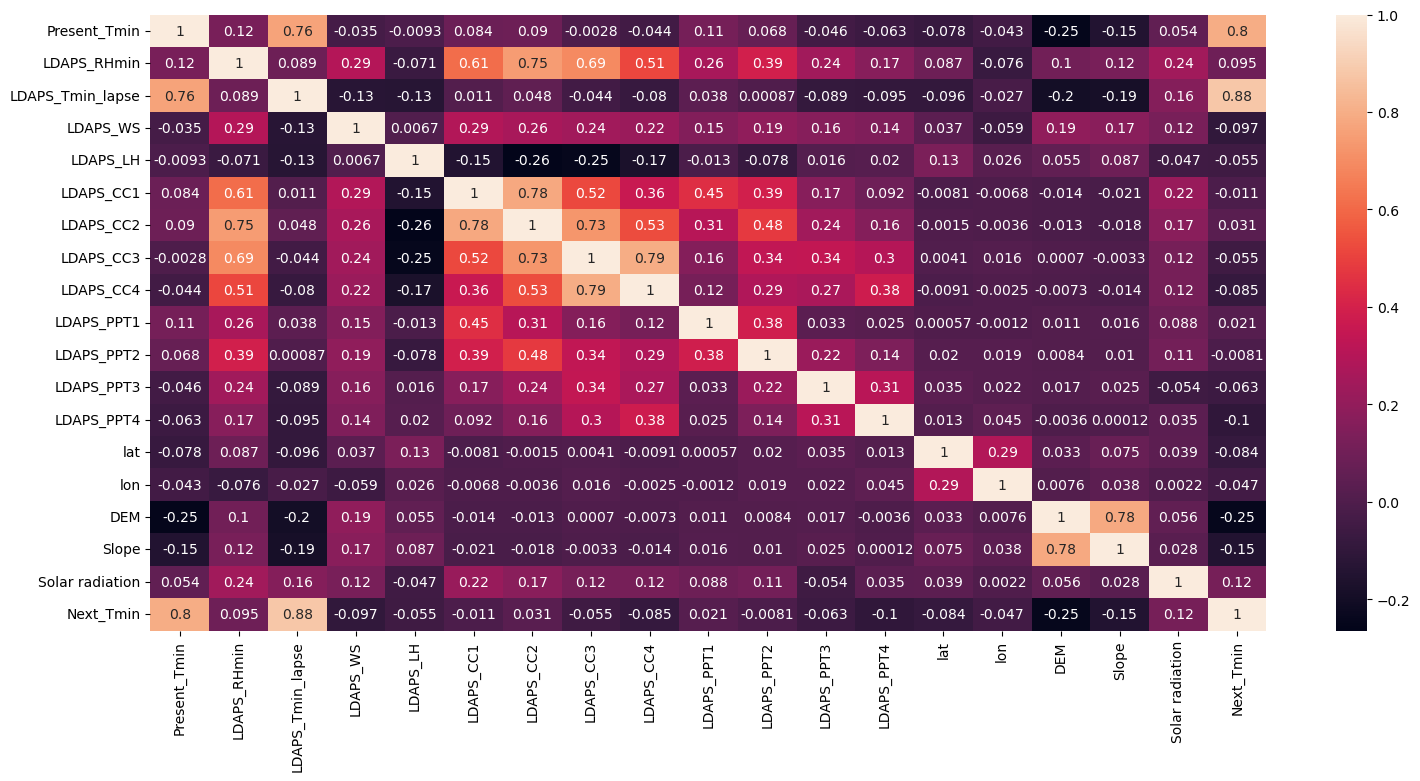

In [39]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC3' v/s 'LDAPS_CC4' has more positive correlation 0.79
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

In [39]:
min_temperature_df.columns

Index(['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmin'],
      dtype='object')

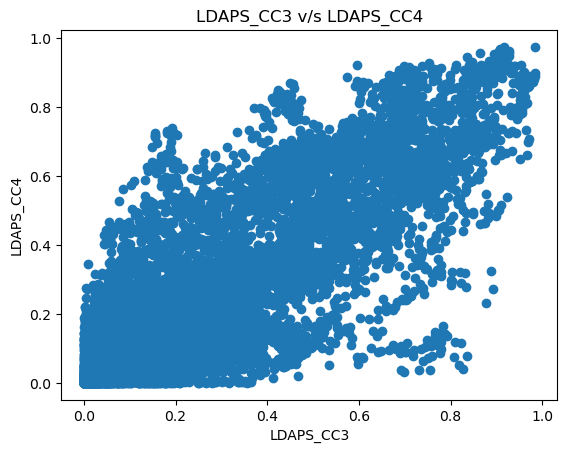

In [40]:
# one more proof so will plot scatter plot and check

plt.scatter(min_temperature_df['LDAPS_CC3'], min_temperature_df.LDAPS_CC4)
plt.xlabel("LDAPS_CC3")
plt.ylabel("LDAPS_CC4")
plt.title("LDAPS_CC3 v/s LDAPS_CC4")
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC3' v/s 'LDAPS_CC4' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'LDAPS_CC3' increases 'LDAPS_CC4' value increases - positive correlation

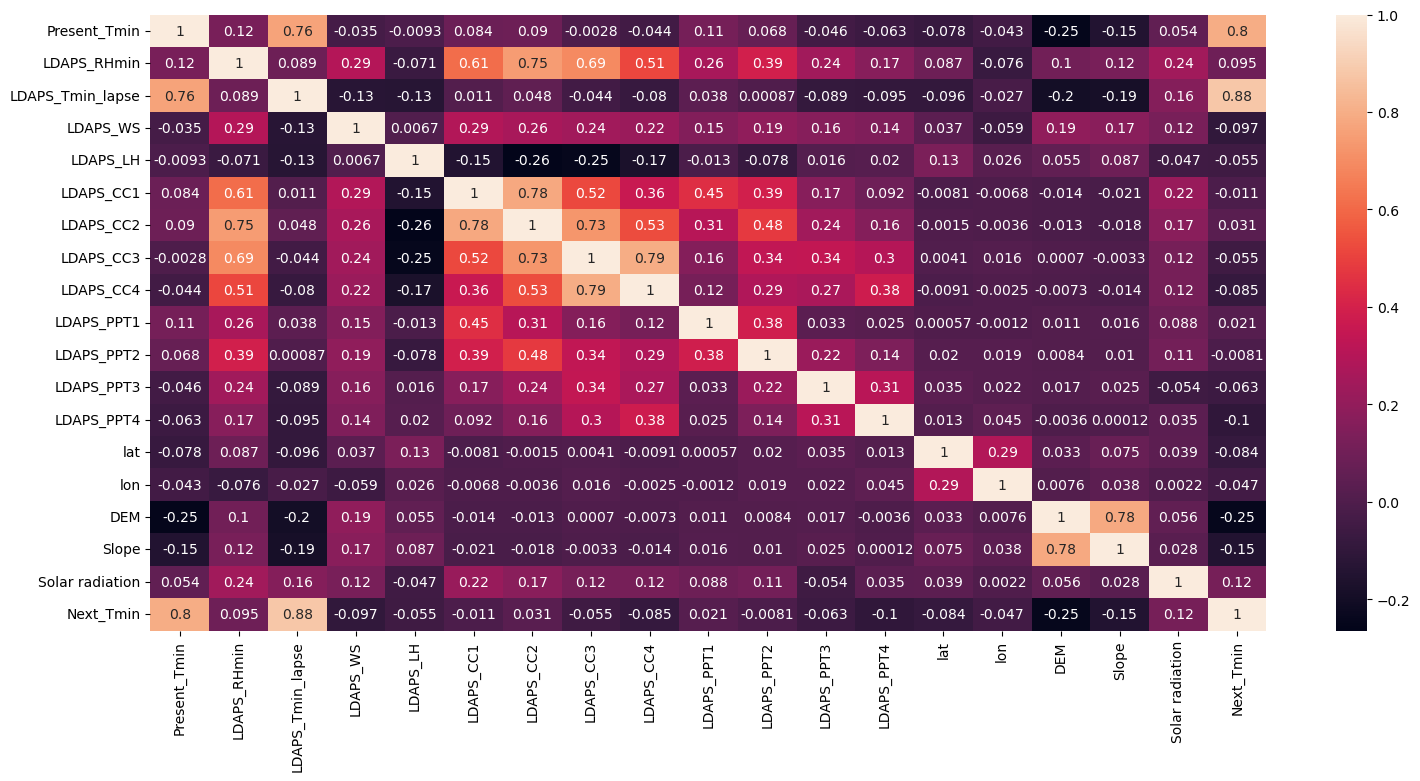

In [41]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'LDAPS_CC3' v/s 'Next_Tmin' is -0.055 and 'LDAPS_CC4' v/s 
               'Next_Tmin' is -0.085 from this heatmap 
                we get to know 'LDAPS_CC4' is contributing more to 'Next_Tmin' than 'LDAPS_CC3'. 
                so we can remove 'LDAPS_CC3' feature.

In [42]:
min_temperature_df.drop(columns = ['LDAPS_CC3'], axis = 1, inplace = True)
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse   LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936   6.818887   
1    2013-06-30          21.6    52.263397         24.035009   5.691890   
2    2013-06-30          23.3    48.690479         24.565633   6.138224   
3    2013-06-30          23.4    58.239788         23.326177   5.650050   
4    2013-06-30          21.9    56.174095         23.486480   5.735004   
...         ...           ...          ...               ...        ...   
7747 2017-08-30          17.1    26.741310         18.775678   6.148918   
7748 2017-08-30          17.7    24.040634         18.733519   6.542819   
7749 2017-08-30          17.4    22.933014         18.522965   7.289264   
7750 2013-07-01          11.3    19.794666         14.272646   2.882580   
7751 2013-07-01          29.9    98.524734         29.619342  21.857621   

        LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      69.451805   0.233947   0.203896   0.130928    0.000000    0.000000   
1      51.937448   0.225508   0.251771   0.127727    0.000000    0.000000   
2      20.573050   0.209344   0.257469   0.142125    0.000000    0.000000   
3      65.727144   0.216372   0.226002   0.134249    0.000000    0.000000   
4     107.965535   0.151407   0.249995   0.170021    0.000000    0.000000   
...          ...        ...        ...        ...         ...         ...   
7747   72.058294   0.030034   0.081035   0.000000    0.000000    0.000000   
7748   47.241457   0.035874   0.074962   0.000000    0.000000    0.000000   
7749    9.090034   0.048954   0.059869   0.000796    0.000000    0.000000   
7750  -13.603212   0.000000   0.000000   0.000000    0.000000    0.000000   
7751  213.414006   0.967277   0.968353   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmin  
0         5992.895996       21.2  
1         5869.312500       22.5  
2         5863.555664       23.9  
3         5856.964844       24.3  
4         5859.552246       22.5  
...               ...        ...  
7747      4443.313965       18.1  
7748      4438.373535       18.8  
7749      4451.345215       17.4  
7750      4329.520508       11.3  
7751      5992.895996       29.8  

[7752 rows x 19 columns]

In [43]:
min_temperature_df.shape

(7752, 19)

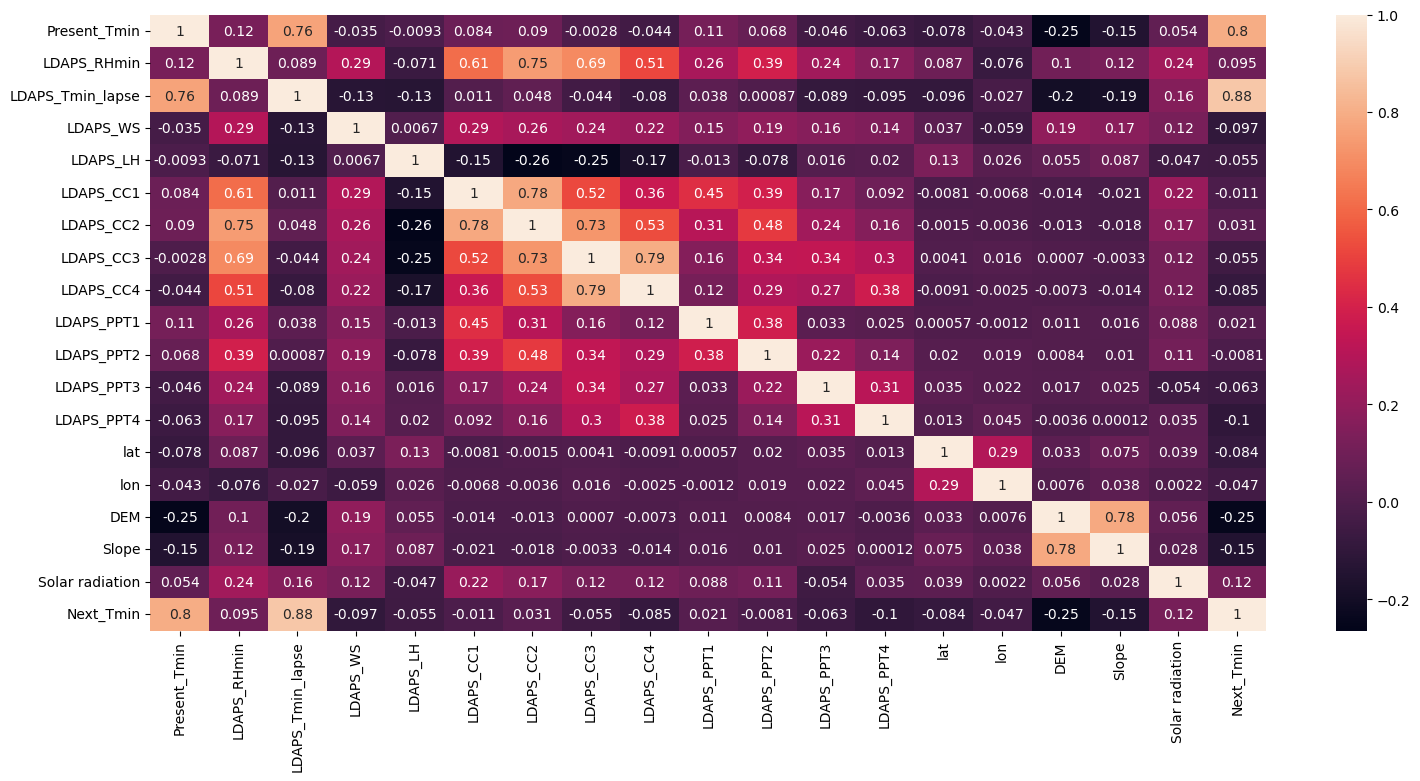

In [44]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC1' v/s 'LDAPS_CC2' has more positive correlation 0.78
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

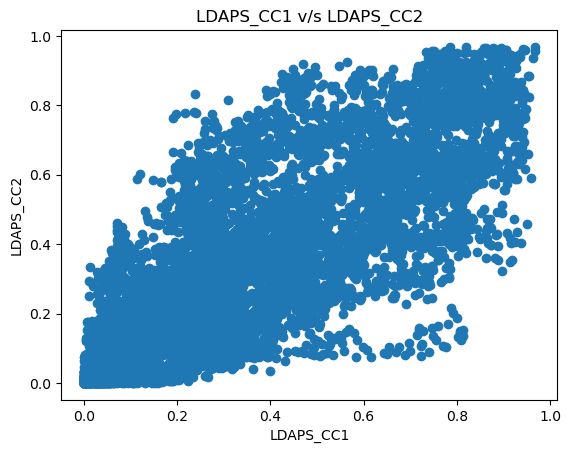

In [45]:
# one more proof so will plot scatter plot and check

plt.scatter(min_temperature_df['LDAPS_CC1'], min_temperature_df.LDAPS_CC2)
plt.xlabel("LDAPS_CC1")
plt.ylabel("LDAPS_CC2")
plt.title("LDAPS_CC1 v/s LDAPS_CC2")
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC1' v/s 'LDAPS_CC2' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'LDAPS_CC1' increases 'LDAPS_CC2' value increases - positive correlation

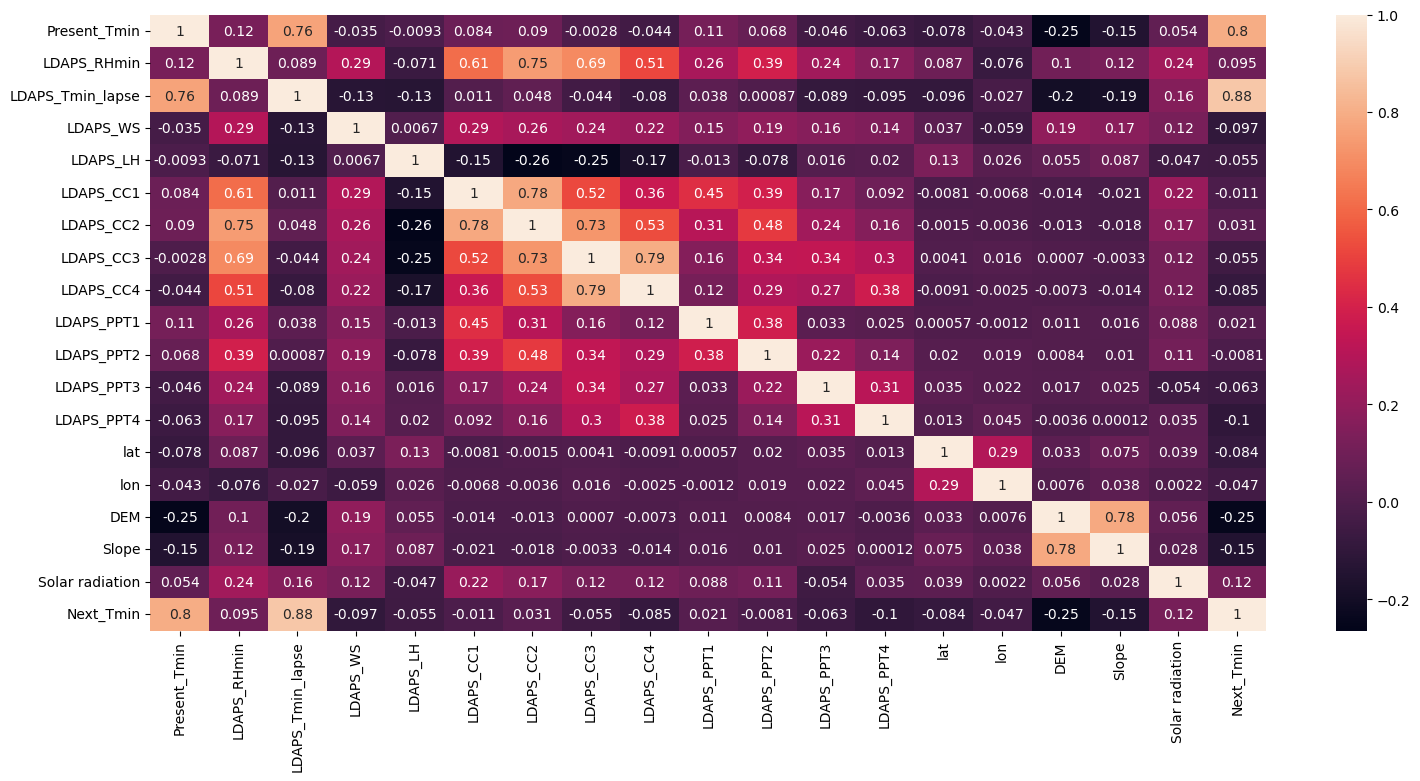

In [46]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'LDAPS_CC1' v/s 'Next_Tmin' is -0.011 and 'LDAPS_CC2' v/s 
               'Next_Tmin' is 0.031 from this heatmap 
                we get to know 'LDAPS_CC2' is contributing more to 'Next_Tmin' than 'LDAPS_CC1'. 
                so we can remove 'LDAPS_CC1' feature.

In [47]:
min_temperature_df.drop(columns = ['LDAPS_CC1'], axis = 1, inplace = True)
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse   LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936   6.818887   
1    2013-06-30          21.6    52.263397         24.035009   5.691890   
2    2013-06-30          23.3    48.690479         24.565633   6.138224   
3    2013-06-30          23.4    58.239788         23.326177   5.650050   
4    2013-06-30          21.9    56.174095         23.486480   5.735004   
...         ...           ...          ...               ...        ...   
7747 2017-08-30          17.1    26.741310         18.775678   6.148918   
7748 2017-08-30          17.7    24.040634         18.733519   6.542819   
7749 2017-08-30          17.4    22.933014         18.522965   7.289264   
7750 2013-07-01          11.3    19.794666         14.272646   2.882580   
7751 2013-07-01          29.9    98.524734         29.619342  21.857621   

        LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      69.451805   0.203896   0.130928    0.000000    0.000000    0.000000   
1      51.937448   0.251771   0.127727    0.000000    0.000000    0.000000   
2      20.573050   0.257469   0.142125    0.000000    0.000000    0.000000   
3      65.727144   0.226002   0.134249    0.000000    0.000000    0.000000   
4     107.965535   0.249995   0.170021    0.000000    0.000000    0.000000   
...          ...        ...        ...         ...         ...         ...   
7747   72.058294   0.081035   0.000000    0.000000    0.000000    0.000000   
7748   47.241457   0.074962   0.000000    0.000000    0.000000    0.000000   
7749    9.090034   0.059869   0.000796    0.000000    0.000000    0.000000   
7750  -13.603212   0.000000   0.000000    0.000000    0.000000    0.000000   
7751  213.414006   0.968353   0.974710   23.701544   21.621661   15.841235   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0       0.000000  37.6046  126.991  212.3350  2.785000      5992.895996   
1       0.000000  37.6046  127.032   44.7624  0.514100      5869.312500   
2       0.000000  37.5776  127.058   33.3068  0.266100      5863.555664   
3       0.000000  37.6450  127.022   45.7160  2.534800      5856.964844   
4       0.000000  37.5507  127.135   35.0380  0.505500      5859.552246   
...          ...      ...      ...       ...       ...              ...   
7747    0.000000  37.5372  126.891   15.5876  0.155400      4443.313965   
7748    0.000000  37.5237  126.909   17.2956  0.222300      4438.373535   
7749    0.000000  37.5237  126.970   19.5844  0.271300      4451.345215   
7750    0.000000  37.4562  126.826   12.3700  0.098475      4329.520508   
7751   16.655469  37.6450  127.135  212.3350  5.178230      5992.895996   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7747       18.1  
7748       18.8  
7749       17.4  
7750       11.3  
7751       29.8  

[7752 rows x 18 columns]

In [48]:
min_temperature_df.shape

(7752, 18)

In [49]:
min_temperature_df.corr().Next_Tmin.sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
lon                -0.046603
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

## Seperating features and target

In [50]:
min_temperature_df.columns

Index(['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmin'],
      dtype='object')

In [51]:
x = min_temperature_df.drop(['Date', 'Next_Tmin'], axis = 1) 
y = min_temperature_df['Next_Tmin']

In [52]:
x.head()

Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0          21.4    58.255688         23.006936  6.818887   69.451805   
1          21.6    52.263397         24.035009  5.691890   51.937448   
2          23.3    48.690479         24.565633  6.138224   20.573050   
3          23.4    58.239788         23.326177  5.650050   65.727144   
4          21.9    56.174095         23.486480  5.735004  107.965535   

   LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0   0.203896   0.130928         0.0         0.0         0.0         0.0   
1   0.251771   0.127727         0.0         0.0         0.0         0.0   
2   0.257469   0.142125         0.0         0.0         0.0         0.0   
3   0.226002   0.134249         0.0         0.0         0.0         0.0   
4   0.249995   0.170021         0.0         0.0         0.0         0.0   

       lat      lon       DEM   Slope  Solar radiation  
0  37.6046  126.991  212.3350  2.7850      5992.895996  
1  37.6046  127.032   44.7624  0.5141      5869.312500  
2  37.5776  127.058   33.3068  0.2661      5863.555664  
3  37.6450  127.022   45.7160  2.5348      5856.964844  
4  37.5507  127.135   35.0380  0.5055      5859.552246

In [53]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

In [54]:
x.shape

(7752, 16)

In [55]:
y.shape

(7752,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [56]:
x.columns

Index(['Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

In [57]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-0.75952931,  0.10251523, -0.21666287, ...,  2.77224286,
         1.11500407,  1.51793488],
       [-0.6762959 , -0.30802721,  0.22384762, ..., -0.31515742,
        -0.54215762,  1.22994952],
       [ 0.03118815, -0.55281415,  0.45121032, ..., -0.52621832,
        -0.7231326 ,  1.21653443],
       ...,
       [-2.42419767, -2.31750374, -2.13796209, ..., -0.77904331,
        -0.71933797, -2.0743251 ],
       [-4.9628169 , -2.5325175 , -3.95914587, ..., -0.91196325,
        -0.8454552 , -2.35821196],
       [ 2.77789093,  2.86141898,  2.61663194, ...,  2.77224286,
         2.86143459,  1.51793488]])

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

VIF Values          Features
0     2.753207      Present_Tmin
1     2.878735       LDAPS_RHmin
2     2.818675  LDAPS_Tmin_lapse
3     1.204847          LDAPS_WS
4     1.216119          LDAPS_LH
5     3.025486         LDAPS_CC2
6     1.722123         LDAPS_CC4
7     1.234693        LDAPS_PPT1
8     1.452775        LDAPS_PPT2
9     1.215890        LDAPS_PPT3
10    1.256465        LDAPS_PPT4
11    1.156108               lat
12    1.135093               lon
13    2.827704               DEM
14    2.757221             Slope
15    1.134975   Solar radiation

Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value. 
               so there is no multicollinearity problem. 

In [59]:
min_temperature_df.head()

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0 2013-06-30          21.4    58.255688         23.006936  6.818887   
1 2013-06-30          21.6    52.263397         24.035009  5.691890   
2 2013-06-30          23.3    48.690479         24.565633  6.138224   
3 2013-06-30          23.4    58.239788         23.326177  5.650050   
4 2013-06-30          21.9    56.174095         23.486480  5.735004   

     LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   69.451805   0.203896   0.130928         0.0         0.0         0.0   
1   51.937448   0.251771   0.127727         0.0         0.0         0.0   
2   20.573050   0.257469   0.142125         0.0         0.0         0.0   
3   65.727144   0.226002   0.134249         0.0         0.0         0.0   
4  107.965535   0.249995   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmin  
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       21.2  
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       22.5  
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       23.9  
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       24.3  
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       22.5

In [60]:
min_temperature_df.shape

(7752, 18)

## Checking Outliers

In [61]:
min_temperature_df.columns

Index(['Date', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmin'],
      dtype='object')

In [62]:
# we dont check outliers for labels - so remove the label

min_temperature_df_features = min_temperature_df.drop(['Date', 'Next_Tmin'], axis = 1)

In [63]:
min_temperature_df_features.shape

(7752, 16)

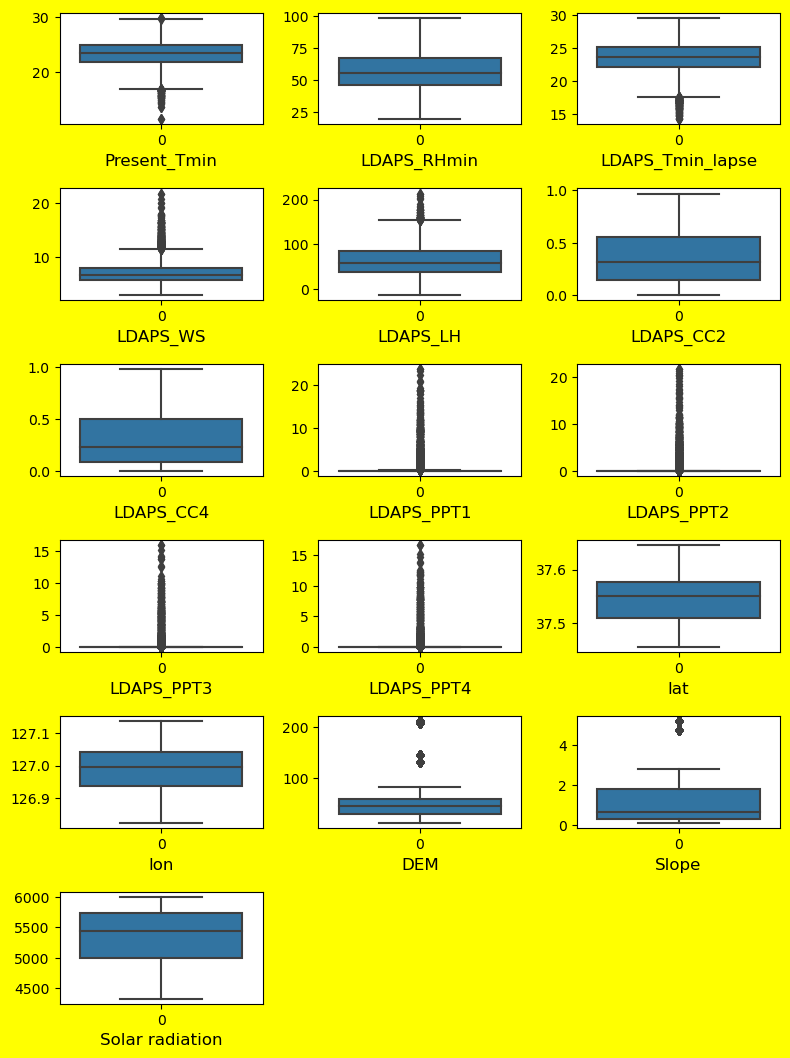

In [64]:
# Visualize the outliers using boxplot

plt.figure(figsize=(8,12), facecolor = 'yellow')
p = 1
for i in min_temperature_df_features:
    if p <= 20:
        ax = plt.subplot(7, 3, p)
        sns.boxplot(data = min_temperature_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observations:
            1. More Outliers found in features 
            2. This outliers are right skewed and left skewed (i.e. outliers are above max value and 
               below min value)

In [65]:
min_temperature_df_features.columns

Index(['Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [66]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = min_temperature_df.quantile(0.25)
q3 = min_temperature_df.quantile(0.75)
iqr = q3 - q1

In [67]:
# validating one outlier

LDAPS_WS_high = (q3['LDAPS_WS'] + (1.5 * iqr['LDAPS_WS']))
LDAPS_WS_high

# anything > 11.488 outliers

11.488946982125

In [68]:
# check the index which have the higher values

np_index = np.where(min_temperature_df['LDAPS_WS'] > LDAPS_WS_high)
np_index

# remove these indexes as they are outliers

(array([  25,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
          38,   39,   40,   42,   43,   44,   45,   46,   47,   48,   49,
          69,   94,  175,  181,  183,  194,  219,  244,  258,  259,  269,
         275,  284,  294,  325,  334,  344,  369,  375,  378,  381,  382,
         383,  384,  386,  388,  389,  393,  394,  397,  398,  399,  400,
         409,  419,  469,  475,  494,  500,  519,  525,  544,  550,  559,
         569,  575,  576,  577,  579,  580,  581,  582,  583,  584,  585,
         586,  587,  588,  589,  590,  591,  592,  593,  594,  595,  596,
         597,  598,  599,  844,  950,  969,  994, 1175, 1194, 1219, 1475,
        1483, 1484, 1494, 1619, 2094, 2100, 2119, 2169, 2175, 2176, 2177,
        2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188,
        2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199,
        2350, 2353, 2361, 2363, 2364, 2368, 2369, 2370, 2372, 2373, 2374,
        2375, 2378, 2381, 2382, 2383, 

In [69]:
min_temperature_df.shape

(7752, 18)

In [70]:
min_temperature_df = min_temperature_df.drop(min_temperature_df.index[np_index])

In [71]:
min_temperature_df.shape  # 377 rows removed - outliers

(7375, 18)

In [72]:
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936  6.818887   
1    2013-06-30          21.6    52.263397         24.035009  5.691890   
2    2013-06-30          23.3    48.690479         24.565633  6.138224   
3    2013-06-30          23.4    58.239788         23.326177  5.650050   
4    2013-06-30          21.9    56.174095         23.486480  5.735004   
...         ...           ...          ...               ...       ...   
7746 2017-08-30          17.4    30.094858         17.814038  5.768083   
7747 2017-08-30          17.1    26.741310         18.775678  6.148918   
7748 2017-08-30          17.7    24.040634         18.733519  6.542819   
7749 2017-08-30          17.4    22.933014         18.522965  7.289264   
7750 2013-07-01          11.3    19.794666         14.272646  2.882580   

        LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      69.451805   0.203896   0.130928         0.0         0.0         0.0   
1      51.937448   0.251771   0.127727         0.0         0.0         0.0   
2      20.573050   0.257469   0.142125         0.0         0.0         0.0   
3      65.727144   0.226002   0.134249         0.0         0.0         0.0   
4     107.965535   0.249995   0.170021         0.0         0.0         0.0   
...          ...        ...        ...         ...         ...         ...   
7746   82.146707   0.024518   0.017678         0.0         0.0         0.0   
7747   72.058294   0.081035   0.000000         0.0         0.0         0.0   
7748   47.241457   0.074962   0.000000         0.0         0.0         0.0   
7749    9.090034   0.059869   0.000796         0.0         0.0         0.0   
7750  -13.603212   0.000000   0.000000         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.785000      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.514100      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.266100      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.534800      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.505500      5859.552246   
...          ...      ...      ...       ...       ...              ...   
7746         0.0  37.5102  127.086   21.9668  0.133200      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.155400      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.222300      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.271300      4451.345215   
7750         0.0  37.4562  126.826   12.3700  0.098475      4329.520508   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7746       17.1  
7747       18.1  
7748       18.8  
7749       17.4  
7750       11.3  

[7375 rows x 18 columns]

In [73]:
min_temperature_df.reset_index(inplace = True, drop = True)

In [74]:
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936  6.818887   
1    2013-06-30          21.6    52.263397         24.035009  5.691890   
2    2013-06-30          23.3    48.690479         24.565633  6.138224   
3    2013-06-30          23.4    58.239788         23.326177  5.650050   
4    2013-06-30          21.9    56.174095         23.486480  5.735004   
...         ...           ...          ...               ...       ...   
7370 2017-08-30          17.4    30.094858         17.814038  5.768083   
7371 2017-08-30          17.1    26.741310         18.775678  6.148918   
7372 2017-08-30          17.7    24.040634         18.733519  6.542819   
7373 2017-08-30          17.4    22.933014         18.522965  7.289264   
7374 2013-07-01          11.3    19.794666         14.272646  2.882580   

        LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      69.451805   0.203896   0.130928         0.0         0.0         0.0   
1      51.937448   0.251771   0.127727         0.0         0.0         0.0   
2      20.573050   0.257469   0.142125         0.0         0.0         0.0   
3      65.727144   0.226002   0.134249         0.0         0.0         0.0   
4     107.965535   0.249995   0.170021         0.0         0.0         0.0   
...          ...        ...        ...         ...         ...         ...   
7370   82.146707   0.024518   0.017678         0.0         0.0         0.0   
7371   72.058294   0.081035   0.000000         0.0         0.0         0.0   
7372   47.241457   0.074962   0.000000         0.0         0.0         0.0   
7373    9.090034   0.059869   0.000796         0.0         0.0         0.0   
7374  -13.603212   0.000000   0.000000         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.785000      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.514100      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.266100      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.534800      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.505500      5859.552246   
...          ...      ...      ...       ...       ...              ...   
7370         0.0  37.5102  127.086   21.9668  0.133200      4441.803711   
7371         0.0  37.5372  126.891   15.5876  0.155400      4443.313965   
7372         0.0  37.5237  126.909   17.2956  0.222300      4438.373535   
7373         0.0  37.5237  126.970   19.5844  0.271300      4451.345215   
7374         0.0  37.4562  126.826   12.3700  0.098475      4329.520508   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7370       17.1  
7371       18.1  
7372       18.8  
7373       17.4  
7374       11.3  

[7375 rows x 18 columns]

In [75]:
# validating another outlier

LDAPS_LH_high = (q3['LDAPS_LH'] + (1.5 * iqr['LDAPS_LH']))
LDAPS_LH_high

# anything > 153.462 outliers

153.4623182625

In [76]:
# check the index which have the higher values

np_index1 = np.where(min_temperature_df['LDAPS_LH'] > LDAPS_LH_high)
np_index1

# remove these indexes as they are outliers

(array([ 911, 1672, 1675, 1676, 1678, 1688, 1691, 1701, 2011, 2220, 2222,
        2270, 2282, 2344, 2357, 2366, 2367, 2931, 2933, 2943, 3031, 3231,
        3244, 3256, 3265, 3268, 3270, 3277, 3783, 3796, 4586, 4598, 4869,
        5266, 5329, 5331, 5556, 5706, 5780, 5804, 5853, 5974, 6002, 6165,
        6190, 6192, 6340, 6342, 6490, 6492, 6502, 6689, 6690, 6692, 6702,
        6717, 6742, 6790, 6792, 6802, 7230, 7246, 7304, 7306], dtype=int64),)

In [77]:
min_temperature_df.shape

(7375, 18)

In [78]:
min_temperature_df = min_temperature_df.drop(min_temperature_df.index[np_index1])

In [79]:
min_temperature_df.shape  # 64 rows removed - outliers

(7311, 18)

In [80]:
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936  6.818887   
1    2013-06-30          21.6    52.263397         24.035009  5.691890   
2    2013-06-30          23.3    48.690479         24.565633  6.138224   
3    2013-06-30          23.4    58.239788         23.326177  5.650050   
4    2013-06-30          21.9    56.174095         23.486480  5.735004   
...         ...           ...          ...               ...       ...   
7370 2017-08-30          17.4    30.094858         17.814038  5.768083   
7371 2017-08-30          17.1    26.741310         18.775678  6.148918   
7372 2017-08-30          17.7    24.040634         18.733519  6.542819   
7373 2017-08-30          17.4    22.933014         18.522965  7.289264   
7374 2013-07-01          11.3    19.794666         14.272646  2.882580   

        LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      69.451805   0.203896   0.130928         0.0         0.0         0.0   
1      51.937448   0.251771   0.127727         0.0         0.0         0.0   
2      20.573050   0.257469   0.142125         0.0         0.0         0.0   
3      65.727144   0.226002   0.134249         0.0         0.0         0.0   
4     107.965535   0.249995   0.170021         0.0         0.0         0.0   
...          ...        ...        ...         ...         ...         ...   
7370   82.146707   0.024518   0.017678         0.0         0.0         0.0   
7371   72.058294   0.081035   0.000000         0.0         0.0         0.0   
7372   47.241457   0.074962   0.000000         0.0         0.0         0.0   
7373    9.090034   0.059869   0.000796         0.0         0.0         0.0   
7374  -13.603212   0.000000   0.000000         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.785000      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.514100      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.266100      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.534800      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.505500      5859.552246   
...          ...      ...      ...       ...       ...              ...   
7370         0.0  37.5102  127.086   21.9668  0.133200      4441.803711   
7371         0.0  37.5372  126.891   15.5876  0.155400      4443.313965   
7372         0.0  37.5237  126.909   17.2956  0.222300      4438.373535   
7373         0.0  37.5237  126.970   19.5844  0.271300      4451.345215   
7374         0.0  37.4562  126.826   12.3700  0.098475      4329.520508   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7370       17.1  
7371       18.1  
7372       18.8  
7373       17.4  
7374       11.3  

[7311 rows x 18 columns]

In [81]:
min_temperature_df.reset_index(inplace = True, drop = True)

In [82]:
min_temperature_df

Date  Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS  \
0    2013-06-30          21.4    58.255688         23.006936  6.818887   
1    2013-06-30          21.6    52.263397         24.035009  5.691890   
2    2013-06-30          23.3    48.690479         24.565633  6.138224   
3    2013-06-30          23.4    58.239788         23.326177  5.650050   
4    2013-06-30          21.9    56.174095         23.486480  5.735004   
...         ...           ...          ...               ...       ...   
7306 2017-08-30          17.4    30.094858         17.814038  5.768083   
7307 2017-08-30          17.1    26.741310         18.775678  6.148918   
7308 2017-08-30          17.7    24.040634         18.733519  6.542819   
7309 2017-08-30          17.4    22.933014         18.522965  7.289264   
7310 2013-07-01          11.3    19.794666         14.272646  2.882580   

        LDAPS_LH  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      69.451805   0.203896   0.130928         0.0         0.0         0.0   
1      51.937448   0.251771   0.127727         0.0         0.0         0.0   
2      20.573050   0.257469   0.142125         0.0         0.0         0.0   
3      65.727144   0.226002   0.134249         0.0         0.0         0.0   
4     107.965535   0.249995   0.170021         0.0         0.0         0.0   
...          ...        ...        ...         ...         ...         ...   
7306   82.146707   0.024518   0.017678         0.0         0.0         0.0   
7307   72.058294   0.081035   0.000000         0.0         0.0         0.0   
7308   47.241457   0.074962   0.000000         0.0         0.0         0.0   
7309    9.090034   0.059869   0.000796         0.0         0.0         0.0   
7310  -13.603212   0.000000   0.000000         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.785000      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.514100      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.266100      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.534800      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.505500      5859.552246   
...          ...      ...      ...       ...       ...              ...   
7306         0.0  37.5102  127.086   21.9668  0.133200      4441.803711   
7307         0.0  37.5372  126.891   15.5876  0.155400      4443.313965   
7308         0.0  37.5237  126.909   17.2956  0.222300      4438.373535   
7309         0.0  37.5237  126.970   19.5844  0.271300      4451.345215   
7310         0.0  37.4562  126.826   12.3700  0.098475      4329.520508   

      Next_Tmin  
0          21.2  
1          22.5  
2          23.9  
3          24.3  
4          22.5  
...         ...  
7306       17.1  
7307       18.1  
7308       18.8  
7309       17.4  
7310       11.3  

[7311 rows x 18 columns]

In [83]:
min_temperature_df.shape

(7311, 18)

## Checking for Skewness

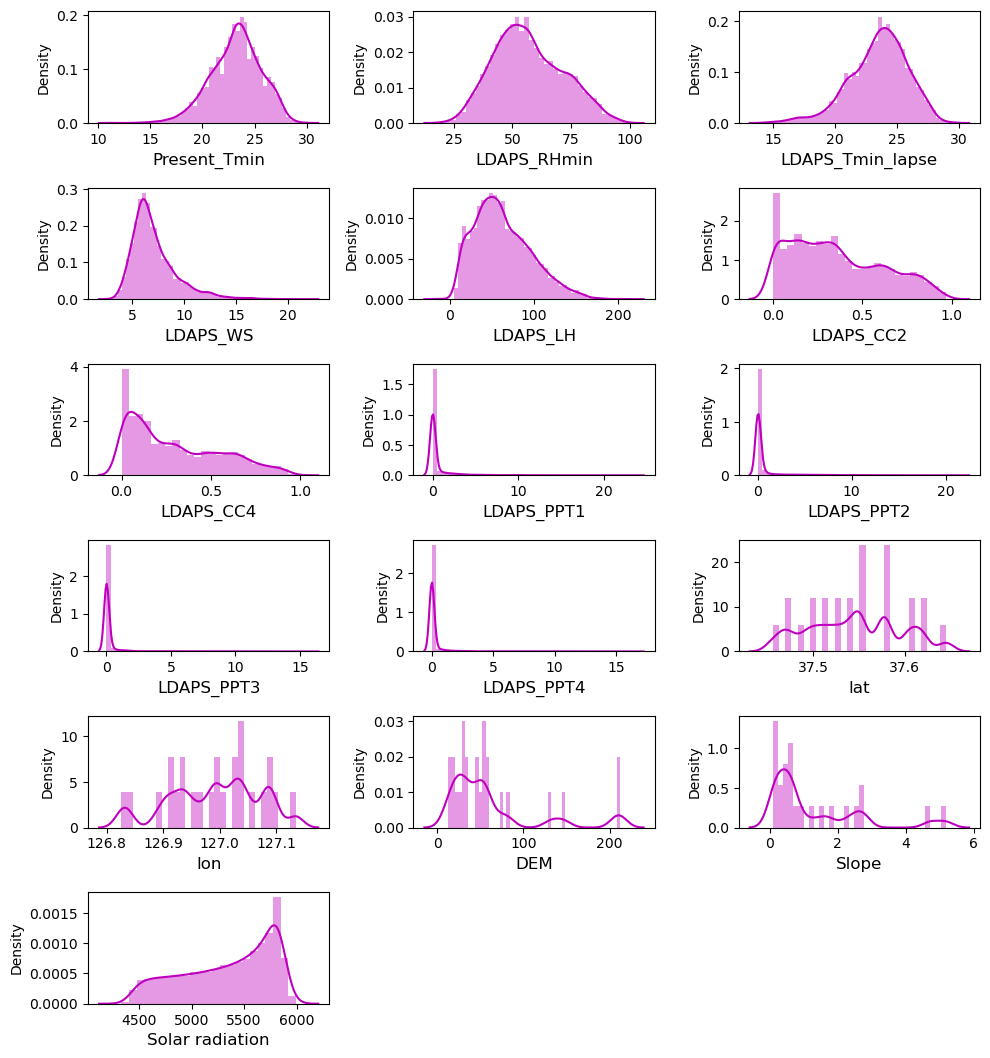

In [84]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in min_temperature_df_features:
    if p <= 20:
        ax = plt.subplot(7, 3, p)
        sns.distplot(min_temperature_df_features[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [85]:
min_temperature_df.skew() # not in the range -0.5 to +0.5

Present_Tmin       -0.358570
LDAPS_RHmin         0.291416
LDAPS_Tmin_lapse   -0.499619
LDAPS_WS            0.677585
LDAPS_LH            0.551045
LDAPS_CC2           0.488822
LDAPS_CC4           0.705209
LDAPS_PPT1          5.425963
LDAPS_PPT2          6.034698
LDAPS_PPT3          6.909461
LDAPS_PPT4          7.008930
lat                 0.108603
lon                -0.288848
DEM                 1.805902
Slope               1.624580
Solar radiation    -0.486926
Next_Tmin          -0.407102
dtype: float64

In [86]:
# removing for skewness

min_temperature_df['LDAPS_WS'] = np.cbrt(min_temperature_df['LDAPS_WS'])

min_temperature_df['LDAPS_CC4'] = np.cbrt(min_temperature_df['LDAPS_CC4'])

min_temperature_df['LDAPS_PPT1'] = np.cbrt(min_temperature_df['LDAPS_PPT1'])

min_temperature_df['LDAPS_PPT2'] = np.cbrt(min_temperature_df['LDAPS_PPT2'])

min_temperature_df['LDAPS_PPT3'] = np.cbrt(min_temperature_df['LDAPS_PPT3'])

min_temperature_df['LDAPS_PPT4'] = np.cbrt(min_temperature_df['LDAPS_PPT4'])

min_temperature_df['DEM'] = np.cbrt(min_temperature_df['DEM'])

min_temperature_df['Slope'] = np.cbrt(min_temperature_df['Slope'])

In [87]:
min_temperature_df.skew() 

Present_Tmin       -0.358570
LDAPS_RHmin         0.291416
LDAPS_Tmin_lapse   -0.499619
LDAPS_WS            0.303105
LDAPS_LH            0.551045
LDAPS_CC2           0.488822
LDAPS_CC4          -0.453783
LDAPS_PPT1          2.051517
LDAPS_PPT2          2.333813
LDAPS_PPT3          2.692626
LDAPS_PPT4          3.057962
lat                 0.108603
lon                -0.288848
DEM                 0.959009
Slope               0.633851
Solar radiation    -0.486926
Next_Tmin          -0.407102
dtype: float64

Observation:
            1. Some features - there are skewness.

## Modelling

In [88]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [89]:
min_temperature_df.shape

(7311, 18)

In [90]:
# setting Date as the DataFrame index

min_temperature_df.set_index('Date', inplace = True)

In [126]:
min_temperature_df.shape

(7311, 17)

In [127]:
min_temperature_df.head()

Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                            
2013-06-30          21.4    58.255688         23.006936  1.896289   69.451805   
2013-06-30          21.6    52.263397         24.035009  1.785468   51.937448   
2013-06-30          23.3    48.690479         24.565633  1.830969   20.573050   
2013-06-30          23.4    58.239788         23.326177  1.781083   65.727144   
2013-06-30          21.9    56.174095         23.486480  1.789965  107.965535   

            LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
Date                                                                   
2013-06-30   0.203896   0.507783         0.0         0.0         0.0   
2013-06-30   0.251771   0.503610         0.0         0.0         0.0   
2013-06-30   0.257469   0.521864         0.0         0.0         0.0   
2013-06-30   0.226002   0.512039         0.0         0.0         0.0   
2013-06-30   0.249995   0.553989         0.0         0.0         0.0   

            LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
Date                                                                            
2013-06-30         0.0  37.6046  126.991  5.965871  1.406938      5992.895996   
2013-06-30         0.0  37.6046  127.032  3.550622  0.801092      5869.312500   
2013-06-30         0.0  37.5776  127.058  3.217444  0.643203      5863.555664   
2013-06-30         0.0  37.6450  127.022  3.575659  1.363477      5856.964844   
2013-06-30         0.0  37.5507  127.135  3.272250  0.796600      5859.552246   

            Next_Tmin  
Date                   
2013-06-30       21.2  
2013-06-30       22.5  
2013-06-30       23.9  
2013-06-30       24.3  
2013-06-30       22.5

In [128]:
x = min_temperature_df.drop(['Next_Tmin'], axis = 1) 
y = min_temperature_df['Next_Tmin']

In [129]:
x.shape

(7311, 16)

In [130]:
y.shape

(7311,)

In [131]:
x.head()

Present_Tmin  LDAPS_RHmin  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                            
2013-06-30          21.4    58.255688         23.006936  1.896289   69.451805   
2013-06-30          21.6    52.263397         24.035009  1.785468   51.937448   
2013-06-30          23.3    48.690479         24.565633  1.830969   20.573050   
2013-06-30          23.4    58.239788         23.326177  1.781083   65.727144   
2013-06-30          21.9    56.174095         23.486480  1.789965  107.965535   

            LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
Date                                                                   
2013-06-30   0.203896   0.507783         0.0         0.0         0.0   
2013-06-30   0.251771   0.503610         0.0         0.0         0.0   
2013-06-30   0.257469   0.521864         0.0         0.0         0.0   
2013-06-30   0.226002   0.512039         0.0         0.0         0.0   
2013-06-30   0.249995   0.553989         0.0         0.0         0.0   

            LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  
Date                                                                           
2013-06-30         0.0  37.6046  126.991  5.965871  1.406938      5992.895996  
2013-06-30         0.0  37.6046  127.032  3.550622  0.801092      5869.312500  
2013-06-30         0.0  37.5776  127.058  3.217444  0.643203      5863.555664  
2013-06-30         0.0  37.6450  127.022  3.575659  1.363477      5856.964844  
2013-06-30         0.0  37.5507  127.135  3.272250  0.796600      5859.552246

In [133]:
# Feature Scaling using Standard Scalarization

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-0.77596668,  0.14522329, -0.25739836, ...,  2.39728652,
         1.31471635,  1.53800975],
       [-0.69207857, -0.2751907 ,  0.19504179, ..., -0.12926687,
        -0.40907152,  1.24712413],
       [ 0.02097037, -0.52586358,  0.42856179, ..., -0.4777994 ,
        -0.85830608,  1.23357393],
       ...,
       [-2.32789673, -2.2552757 , -2.1380676 , ..., -1.13823873,
        -0.96479216, -2.12095967],
       [-2.45372889, -2.33298539, -2.23072913, ..., -1.02381324,
        -0.84646206, -2.09042748],
       [-5.01231626, -2.55316918, -4.10123319, ..., -1.42421556,
        -1.3744831 , -2.37717334]])

## HoldOut Validation Approach

In [134]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [135]:
x_train.shape

(5483, 16)

In [136]:
y_train.shape

(5483,)

In [137]:
x_test.shape

(1828, 16)

In [138]:
y_test.shape

(1828,)

## Linear Regression

## We select KFold cross validation

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [140]:
kfold = KFold(n_splits = 5, shuffle = True)

In [141]:
model_LR = LinearRegression()

In [143]:
LR_scores1 = cross_val_score(model_LR, x_train, y_train, cv = kfold, scoring = 'r2')
LR_scores1

array([0.83253187, 0.82859419, 0.82450682, 0.81109312, 0.80466421])

In [144]:
print(np.mean(LR_scores1)) 

0.8202780413809526


In [145]:
model_LR.fit(x_train , y_train)

LinearRegression()

In [146]:
model_LR.score(x_test, y_test)

0.8262615664178151

In [147]:
y_pred = model_LR.predict(x_test)
y_pred

array([19.04106475, 21.38942574, 19.81556184, ..., 21.71425025,
       22.42083062, 21.07257177])

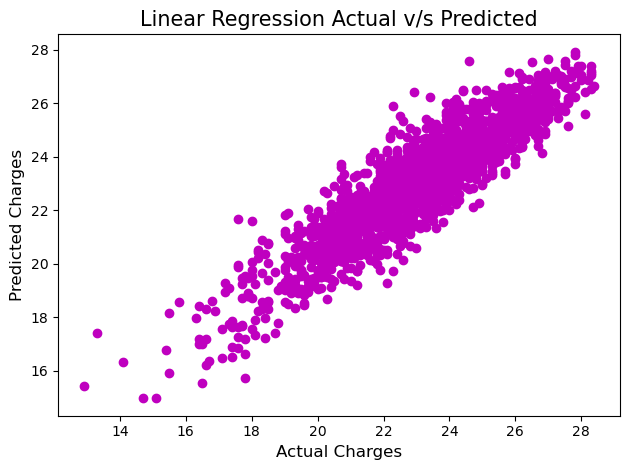

In [148]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

Observation:
            1. Good number of samples are following linear curve

In [149]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [150]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  82.6261566417815
MAE  0.7787345248819946
MSE  0.9788792886392477
RMSE  0.9893832870223994


Observation:
            1. Linear Regression model with kfold cross validation - 82.62%

## Random Forest Regression

In [152]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 348)

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
RFR = RandomForestRegressor()

In [158]:
kfold = KFold(n_splits = 5, shuffle = True)

In [160]:
RF_scores1 = cross_val_score(RFR, x_train1, y_train1, cv = kfold, scoring = 'r2')
RF_scores1

array([0.89024849, 0.88187421, 0.88961677, 0.89013611, 0.88881691])

In [161]:
print(np.mean(RF_scores1)) 

0.8881384972582446


In [162]:
RFR.fit(x_train1, y_train1)

RandomForestRegressor()

In [163]:
pred_RFR = RFR.predict(x_test1)
pred_RFR

array([24.225, 23.135, 23.047, ..., 19.598, 22.391, 23.887])

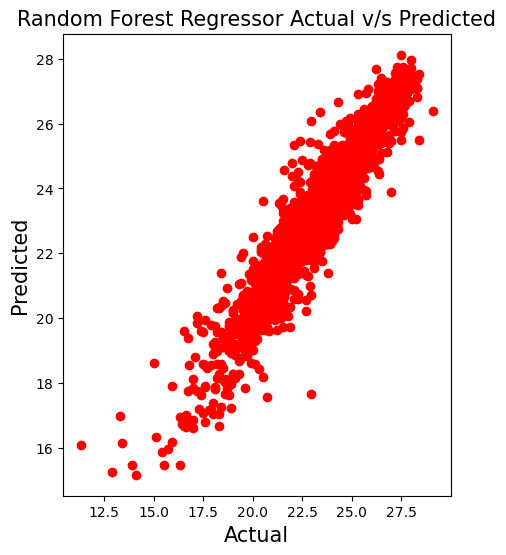

In [164]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test1, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. We are able to see good number of samples are following linear curve

In [165]:
print("r2_score on test data ", r2_score(y_test1, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test1, pred_RFR))

print("MSE ", mean_squared_error(y_test1, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, pred_RFR)))

r2_score on test data  88.81179358375124
MAE  0.615485180330423
MSE  0.6913479181631468
RMSE  0.8314733418235047


Observation:
            1. Random Forest Regression model with kfold cross validation - 88.81%

## KNN Regressor

In [167]:
from sklearn.neighbors import KNeighborsRegressor

In [168]:
kfold = KFold(n_splits = 5, shuffle = True)

In [169]:
knn = KNeighborsRegressor()

In [171]:
knn_scores1 = cross_val_score(knn, x_train, y_train, cv = kfold, scoring = 'r2')
knn_scores1

array([0.84365308, 0.85592748, 0.83221877, 0.85191063, 0.84933817])

In [172]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [173]:
pred_knn = knn.predict(x_test)
pred_knn

array([19.36, 21.02, 19.88, ..., 21.2 , 22.76, 20.92])

In [174]:
## Lets check how well model fits on test data

knn.score(x_test, y_test)

0.8479512180002868

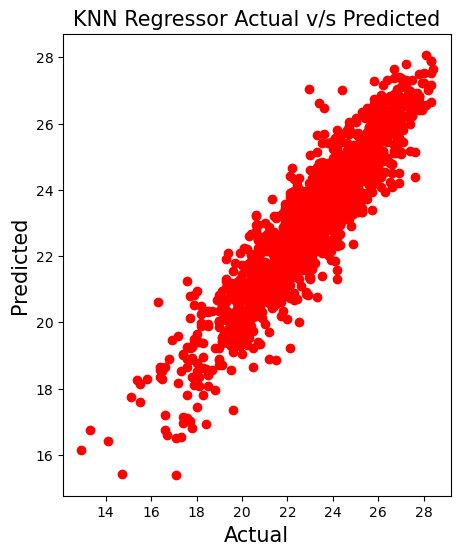

In [175]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_knn, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

In [176]:
print("r2_score on test data ", r2_score(y_test, pred_knn) * 100)

print("MAE ", mean_absolute_error(y_test, pred_knn))

print("MSE ", mean_squared_error(y_test, pred_knn))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_knn)))

r2_score on test data  84.79512180002868
MAE  0.7071071048699482
MSE  0.8566751782756086
RMSE  0.9255674898545263


In [ ]:
Observation:
            1. KNN Regression model with kfold cross validation - 84.79%

## Ridge Regression

In [178]:
from sklearn.linear_model import Ridge

In [179]:
kfold = KFold(n_splits = 5, shuffle = True)

In [180]:
ridge = Ridge()

In [181]:
ridge_scores1 = cross_val_score(ridge, x_train, y_train, cv = kfold, scoring = 'r2')
ridge_scores1

array([0.83827292, 0.80799238, 0.82613169, 0.80575656, 0.82308642])

In [182]:
print(np.mean(ridge_scores1))

0.8202479939623135


In [183]:
ridge.fit(x_train, y_train)

Ridge()

In [184]:
pred_ridge = ridge.predict(x_test)
pred_ridge

array([19.04164299, 21.38922896, 19.81592638, ..., 21.71404364,
       22.42125668, 21.07321979])

In [185]:
## Lets check how well model fits on test data

ridge.score(x_test, y_test)

0.8262543807778984

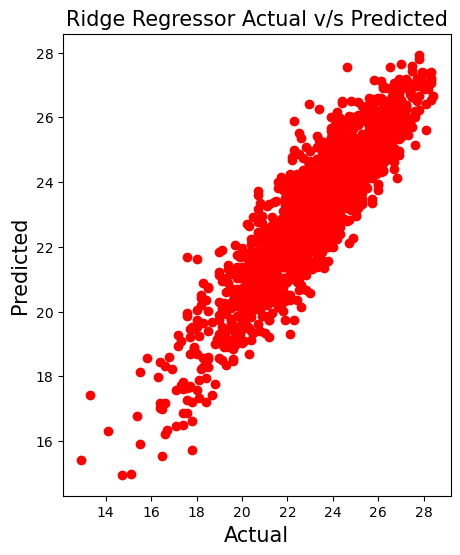

In [186]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

In [187]:
print("r2_score on test data ", r2_score(y_test, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test, pred_ridge))

print("MSE ", mean_squared_error(y_test, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_ridge)))

r2_score on test data  82.62543807778984
MAE  0.7787532967353981
MSE  0.9789197740629109
RMSE  0.9894037467398791


Observation: 
            1. Ridge Regressor model with KFold Cross Validation method - accuracy - 82.62%

Observation:
            1. Linear Regression model with kfold cross validation - 82.62%
            2. Random Forest Regression model with kfold cross validation - 88.81%
            3. KNN Regression model with kfold cross validation - 84.79%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 82.62%
            5. Random Forest Regression model has more accuracy so we will hyper tune.

## HyperParameter Tuning for Random Forest Regressor model as its accuracy is better 88.81%

In [188]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [189]:
kf = KFold(n_splits = 5, shuffle = True)

In [190]:
grid_search = GridSearchCV(RFR, param_grid, scoring = 'r2', cv = kf)

In [191]:
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [192]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [193]:
RFR_hyper_model = grid_search.best_estimator_

## Retrain the model

In [194]:
RFR_hyper_model.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=200)

In [195]:
RFR_testing_acc = RFR_hyper_model.score(x_test1, y_test1)
RFR_testing_acc

0.8901855701809313

Observation:
            1. Linear Regression model with kfold cross validation - 82.62%
            2. Random Forest Regression model with kfold cross validation - 88.81%
            3. KNN Regression model with kfold cross validation - 84.79%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 82.62%
            5. Random Forest Regression model with hyper parameter tuning - 89.01%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc - 89.01%

## Saving the model

In [196]:
import pickle
filename = "Minimum_Temperature_Forecast_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [197]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Minimum_Temperature_Forecast_Model.pkl', 'rb'))

In [198]:
loaded_model1.score(x_test1, y_test1)

0.8901855701809313

In [199]:
prediction = loaded_model1.predict(x_test1)
prediction

array([24.2951611, 23.089    , 23.0545   , ..., 19.6635   , 22.277    ,
       23.8424833])

In [201]:
# comparing the predicted and actual values

a = np.array(y_test1)
df1 = pd.DataFrame()
df1['Predicted'] = prediction
df1['Original'] = a
df1

Predicted  Original
0     24.295161      24.3
1     23.089000      23.1
2     23.054500      22.9
3     24.004000      23.1
4     26.959500      27.1
...         ...       ...
1823  21.986467      19.4
1824  20.532000      20.3
1825  19.663500      20.8
1826  22.277000      21.8
1827  23.842483      23.7

[1828 rows x 2 columns]

Observation:
            1. Almost all actual and predicted values match
            2. This Minimum_Temperature_Forecast_Model.pkl can be used to predict the minimum 
               temperature for the next day - 'Next_Tmin'

Observation:
            1. Linear Regression model with kfold cross validation - 82.62%
            2. Random Forest Regression model with kfold cross validation - 88.81%
            3. KNN Regression model with kfold cross validation - 84.79%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 82.62%
            5. Random Forest Regression model with hyper parameter tuning - 89.01%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc - 89.01% and our model is not overfitted 

## Temperature Forecast Project - predict the  Maximum temperature for the next day

## Data Collection

In [202]:
max_temperature_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
max_temperature_df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Observation:
            1. Predict the maximum temperature for the next day is a continous data so this is a 
               Regression problem. 
            2. The target is 'Next_Tmax' - The next-day maximum air temperature (Â°C): 17.4 to 38.9

## Exploratory Data Analysis

In [203]:
max_temperature_df.shape

(7752, 25)

In [204]:
max_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [205]:
max_temperature_df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Drop Columns not needed

In [206]:
max_temperature_df.shape

(7752, 25)

In [207]:
max_temperature_df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [208]:
# 'station', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse',  'Next_Tmin' column not needed 
# for prediction of 'Next_Tmax'

max_temperature_df.drop(['station', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmin_lapse', 'Next_Tmin'], axis = 1, inplace = True)

In [209]:
max_temperature_df.shape

(7752, 20)

## Handle Null values

In [210]:
max_temperature_df.dtypes

Date                 object
Present_Tmax        float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
dtype: object

In [211]:
max_temperature_df.isna().sum()

Date                 2
Present_Tmax        70
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
dtype: int64

Observation:
            1. There are NULL values in many columns

In [212]:
max_temperature_df.columns

Index(['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [213]:
# Handle all features Null values - Object type

for i in max_temperature_df.columns:
    if max_temperature_df.dtypes[i] == 'object':
        max_temperature_df[i] = max_temperature_df[i].fillna(max_temperature_df[i].mode()[0])

In [214]:
max_temperature_df.isna().sum()

Date                 0
Present_Tmax        70
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
dtype: int64

In [215]:
# Handle all features Null values  - Float type

for i in max_temperature_df.columns:
    if max_temperature_df.dtypes[i] == 'float64':
        max_temperature_df[i] = max_temperature_df[i].fillna(max_temperature_df[i].mean())

In [216]:
max_temperature_df.isna().sum()

Date                0
Present_Tmax        0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

Observation:
            1. Now no NULL values

## Number of uniques values in each column 

In [217]:
max_temperature_df.nunique().to_frame("No. of Unique Values")

No. of Unique Values
Date                               310
Present_Tmax                       168
LDAPS_RHmax                       7665
LDAPS_Tmax_lapse                  7676
LDAPS_WS                          7676
LDAPS_LH                          7676
LDAPS_CC1                         7570
LDAPS_CC2                         7583
LDAPS_CC3                         7600
LDAPS_CC4                         7525
LDAPS_PPT1                        2813
LDAPS_PPT2                        2511
LDAPS_PPT3                        2357
LDAPS_PPT4                        1919
lat                                 12
lon                                 25
DEM                                 25
Slope                               27
Solar radiation                   1575
Next_Tmax                          184

In [218]:
max_temperature_df.describe()

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse     LDAPS_WS     LDAPS_LH  \
count   7752.000000  7752.000000       7752.000000  7752.000000  7752.000000   
mean      29.768211    88.374804         29.613447     7.097875    62.505019   
std        2.956557     7.157124          2.932898     2.173245    33.567001   
min       20.000000    58.936283         17.624954     2.882580   -13.603212   
25%       27.800000    84.316923         27.693091     5.686487    37.532764   
50%       29.900000    89.699505         29.662273     6.563068    57.310630   
75%       32.000000    93.704500         31.683819     8.007471    83.904586   
max       37.600000   100.000153         38.542255    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.261185     0.256810     0.249148     0.253114     1.936331   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148321     0.142328     0.103100     0.082741     0.000000   
50%       0.320110     0.315667     0.265264     0.232354     0.000000   
75%       0.571696     0.554963     0.494007     0.497230     0.067593   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.754258     1.156174     1.200364     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.024276     0.009697     0.000693    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax  
count  7752.000000  7752.000000      7752.000000  7752.000000  
mean     61.867972     1.257048      5341.502803    30.274887  
std      54.279780     1.370444       429.158867     3.122557  
min      12.370000     0.098475      4329.520508    17.400000  
25%      28.700000     0.271300      4999.018555    28.200000  
50%      45.716000     0.618000      5436.345215    30.500000  
75%      59.832400     1.767800      5728.316406    32.600000  
max     212.335000     5.178230      5992.895996    38.900000

Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers

## Date cannnot be object type - it should be datetime type, so convert

In [219]:
max_temperature_df.dtypes

Date                 object
Present_Tmax        float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
dtype: object

In [220]:
max_temperature_df.Date.min()

'01-07-2013'

In [221]:
max_temperature_df['Date'] = pd.to_datetime(max_temperature_df.Date, format = "%d-%m-%Y")

In [222]:
max_temperature_df['Date'].dtype

dtype('<M8[ns]')

In [223]:
max_temperature_df.dtypes

Date                datetime64[ns]
Present_Tmax               float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
dtype: object

In [224]:
max_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7752 non-null   datetime64[ns]
 1   Present_Tmax      7752 non-null   float64       
 2   LDAPS_RHmax       7752 non-null   float64       
 3   LDAPS_Tmax_lapse  7752 non-null   float64       
 4   LDAPS_WS          7752 non-null   float64       
 5   LDAPS_LH          7752 non-null   float64       
 6   LDAPS_CC1         7752 non-null   float64       
 7   LDAPS_CC2         7752 non-null   float64       
 8   LDAPS_CC3         7752 non-null   float64       
 9   LDAPS_CC4         7752 non-null   float64       
 10  LDAPS_PPT1        7752 non-null   float64       
 11  LDAPS_PPT2        7752 non-null   float64       
 12  LDAPS_PPT3        7752 non-null   float64       
 13  LDAPS_PPT4        7752 non-null   float64       
 14  lat               7752 n

In [225]:
max_temperature_df.head()

Date  Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  \
0 2013-06-30          28.7    91.116364         28.074101  6.818887   
1 2013-06-30          31.9    90.604721         29.850689  5.691890   
2 2013-06-30          31.6    83.973587         30.091292  6.138224   
3 2013-06-30          32.0    96.483688         29.704629  5.650050   
4 2013-06-30          31.4    90.155128         29.113934  5.735004   

     LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
0   69.451805   0.233947   0.203896   0.161697   0.130928         0.0   
1   51.937448   0.225508   0.251771   0.159444   0.127727         0.0   
2   20.573050   0.209344   0.257469   0.204091   0.142125         0.0   
3   65.727144   0.216372   0.226002   0.161157   0.134249         0.0   
4  107.965535   0.151407   0.249995   0.178892   0.170021         0.0   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  
0      5992.895996       29.1  
1      5869.312500       30.5  
2      5863.555664       31.1  
3      5856.964844       31.7  
4      5859.552246       31.2

In [226]:
max_temperature_df.shape

(7752, 20)

## Data Visualization

In [227]:
max_temperature_df.columns

Index(['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [228]:
# seperating numerical and categorical columns

cat_col = []
for i in max_temperature_df.dtypes.index:
    if max_temperature_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in max_temperature_df.dtypes.index:
    if max_temperature_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column []


Numerical Column ['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax']


29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.5      1
38.7      1
37.4      1
20.9      1
21.8      1
Name: Next_Tmax, Length: 184, dtype: int64


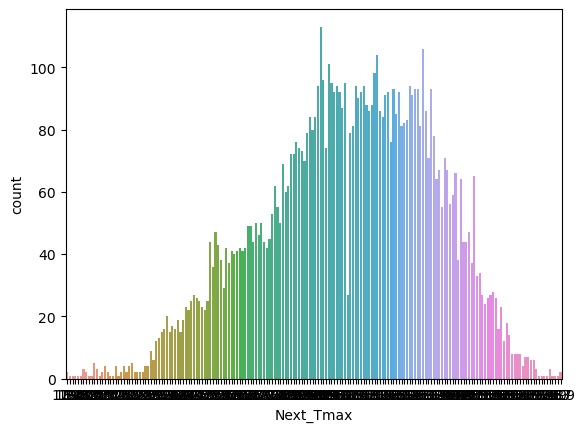

In [229]:
# Univariate Analysis

sns.countplot(x = 'Next_Tmax', data = max_temperature_df)
print(max_temperature_df.Next_Tmax.value_counts())

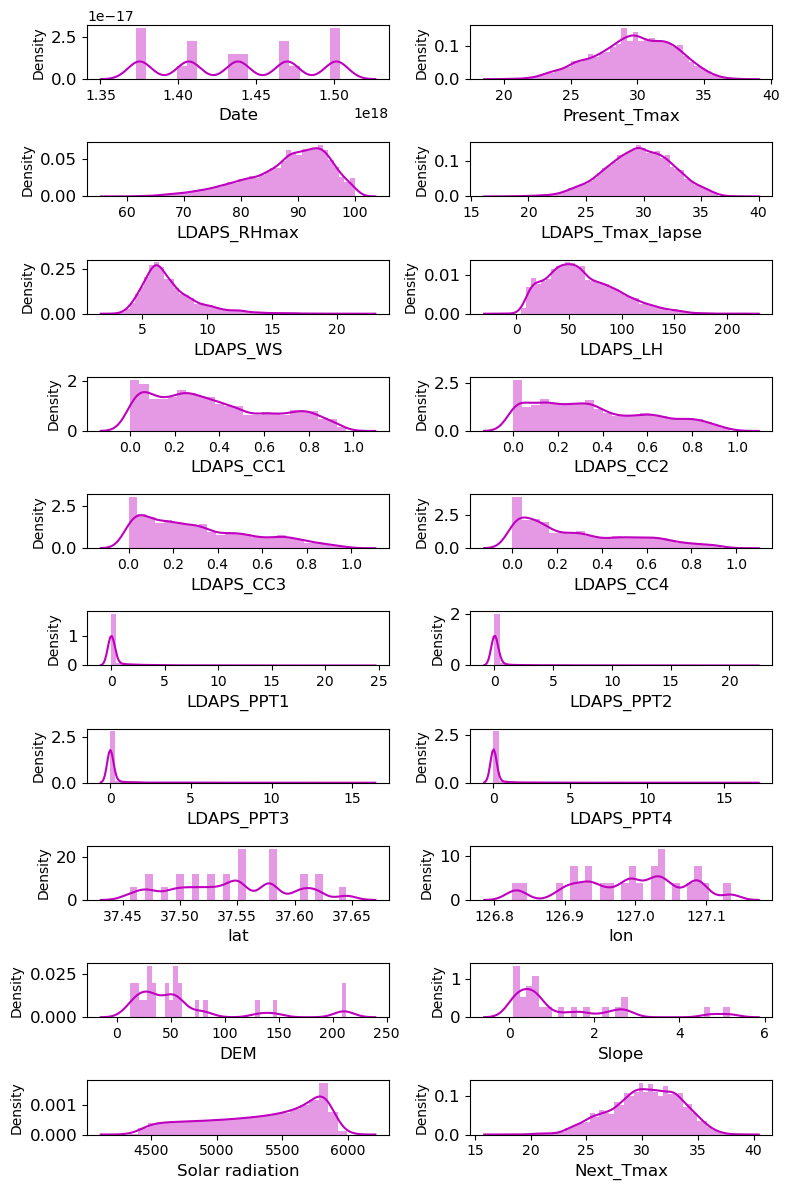

In [230]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(8,12))
p = 1
for i in num_col:
    if p <= 20:
        ax = plt.subplot(10, 2, p)
        sns.distplot(max_temperature_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Almost all continuous data are not well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

In [231]:
max_temperature_df.columns

Index(['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [232]:
max_temperature_df.shape

(7752, 20)

## Check for Multicollinearity

In [233]:
max_temperature_df.shape

(7752, 20)

In [234]:
# get coefficient of one variable with all the other variables

cor = max_temperature_df.corr()
cor

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  \
Present_Tmax          1.000000    -0.301787          0.570129 -0.121820   
LDAPS_RHmax          -0.301787     1.000000         -0.373404  0.135333   
LDAPS_Tmax_lapse      0.570129    -0.373404          1.000000 -0.311996   
LDAPS_WS             -0.121820     0.135333         -0.311996  1.000000   
LDAPS_LH              0.135463     0.238579          0.048010  0.006711   
LDAPS_CC1            -0.311805     0.436652         -0.438439  0.289445   
LDAPS_CC2            -0.213791     0.391330         -0.523619  0.261090   
LDAPS_CC3            -0.144018     0.226957         -0.541327  0.242991   
LDAPS_CC4            -0.140729     0.130619         -0.429539  0.220533   
LDAPS_PPT1           -0.109006     0.268449         -0.111065  0.152587   
LDAPS_PPT2           -0.099449     0.229050         -0.242122  0.191886   
LDAPS_PPT3           -0.120367     0.134607         -0.188115  0.161684   
LDAPS_PPT4           -0.099607     0.117853         -0.160273  0.144085   
lat                  -0.052615     0.195798         -0.042093  0.036657   
lon                   0.009020     0.025667          0.090666 -0.059466   
DEM                  -0.187121     0.177168         -0.178895  0.191053   
Slope                -0.105809     0.219599         -0.162332  0.171629   
Solar radiation      -0.025439     0.149261          0.047971  0.121759   
Next_Tmax             0.610348    -0.283738          0.827189 -0.342729   

                  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
Present_Tmax      0.135463  -0.311805  -0.213791  -0.144018  -0.140729   
LDAPS_RHmax       0.238579   0.436652   0.391330   0.226957   0.130619   
LDAPS_Tmax_lapse  0.048010  -0.438439  -0.523619  -0.541327  -0.429539   
LDAPS_WS          0.006711   0.289445   0.261090   0.242991   0.220533   
LDAPS_LH          1.000000  -0.147296  -0.264280  -0.245583  -0.172766   
LDAPS_CC1        -0.147296   1.000000   0.779683   0.517493   0.361046   
LDAPS_CC2        -0.264280   0.779683   1.000000   0.725813   0.527708   
LDAPS_CC3        -0.245583   0.517493   0.725813   1.000000   0.793711   
LDAPS_CC4        -0.172766   0.361046   0.527708   0.793711   1.000000   
LDAPS_PPT1       -0.012542   0.446328   0.305975   0.159280   0.120483   
LDAPS_PPT2       -0.077545   0.389453   0.478472   0.337569   0.288195   
LDAPS_PPT3        0.016102   0.168742   0.240134   0.339800   0.267494   
LDAPS_PPT4        0.019979   0.091722   0.159548   0.302357   0.376049   
lat               0.133221  -0.008131  -0.001497   0.004108  -0.009107   
lon               0.025822  -0.006843  -0.003581   0.016041  -0.002477   
DEM               0.055133  -0.014090  -0.012823   0.000697  -0.007334   
Slope             0.086781  -0.020752  -0.018073  -0.003338  -0.014459   
Solar radiation  -0.047384   0.218309   0.170403   0.119292   0.119983   
Next_Tmax         0.157616  -0.452541  -0.490756  -0.514680  -0.446319   

                  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
Present_Tmax       -0.109006   -0.099449   -0.120367   -0.099607 -0.052615   
LDAPS_RHmax         0.268449    0.229050    0.134607    0.117853  0.195798   
LDAPS_Tmax_lapse   -0.111065   -0.242122   -0.188115   -0.160273 -0.042093   
LDAPS_WS            0.152587    0.191886    0.161684    0.144085  0.036657   
LDAPS_LH           -0.012542   -0.077545    0.016102    0.019979  0.133221   
LDAPS_CC1           0.446328    0.389453    0.168742    0.091722 -0.008131   
LDAPS_CC2           0.305975    0.478472    0.240134    0.159548 -0.001497   
LDAPS_CC3           0.159280    0.337569    0.339800    0.302357  0.004108   
LDAPS_CC4           0.120483    0.288195    0.267494    0.376049 -0.009107   
LDAPS_PPT1          1.000000    0.383831    0.033004    0.024626  0.000565   
LDAPS_PPT2          0.383831    1.000000    0.221172    0.139555  0.019564   
LDAPS_PPT3          0.033004    0.221172    1.000000    0.309076  0.035110   
LDAPS_PPT4          0.

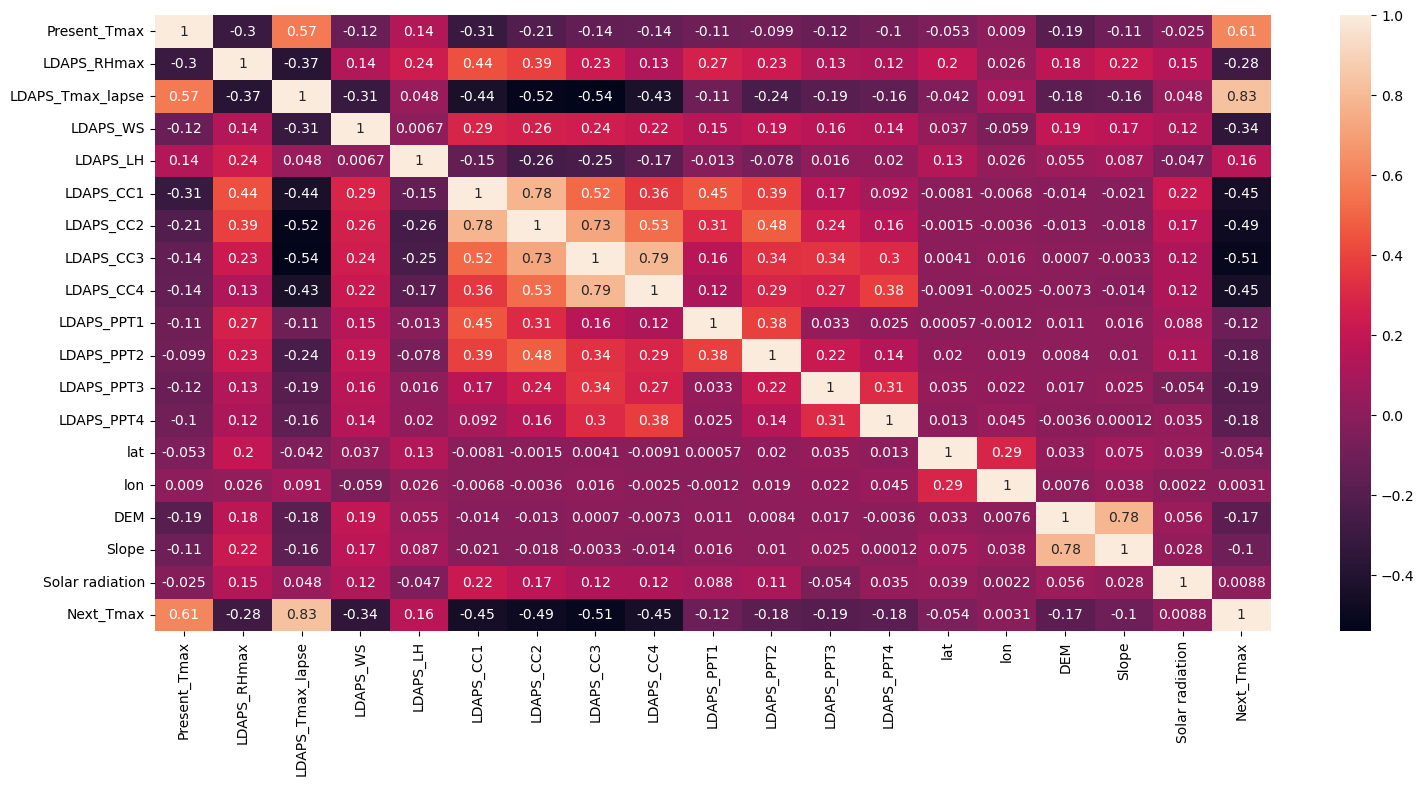

In [184]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC3' v/s 'LDAPS_CC4' has more positive correlation 0.79
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

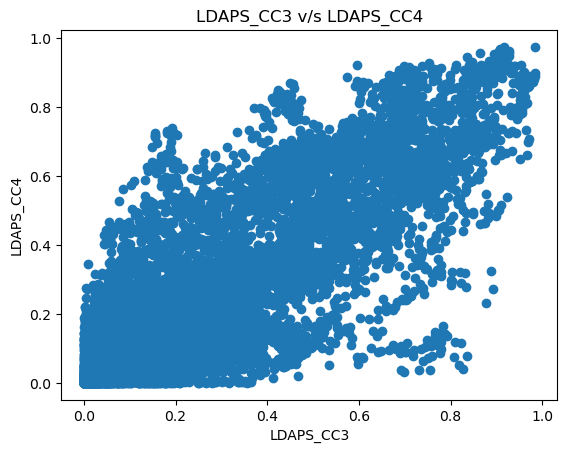

In [235]:
# one more proof so will plot scatter plot and check

plt.scatter(max_temperature_df['LDAPS_CC3'], max_temperature_df.LDAPS_CC4)
plt.xlabel("LDAPS_CC3")
plt.ylabel("LDAPS_CC4")
plt.title("LDAPS_CC3 v/s LDAPS_CC4")
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC3' v/s 'LDAPS_CC4' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'LDAPS_CC3' increases 'LDAPS_CC4' value increases - positive correlation

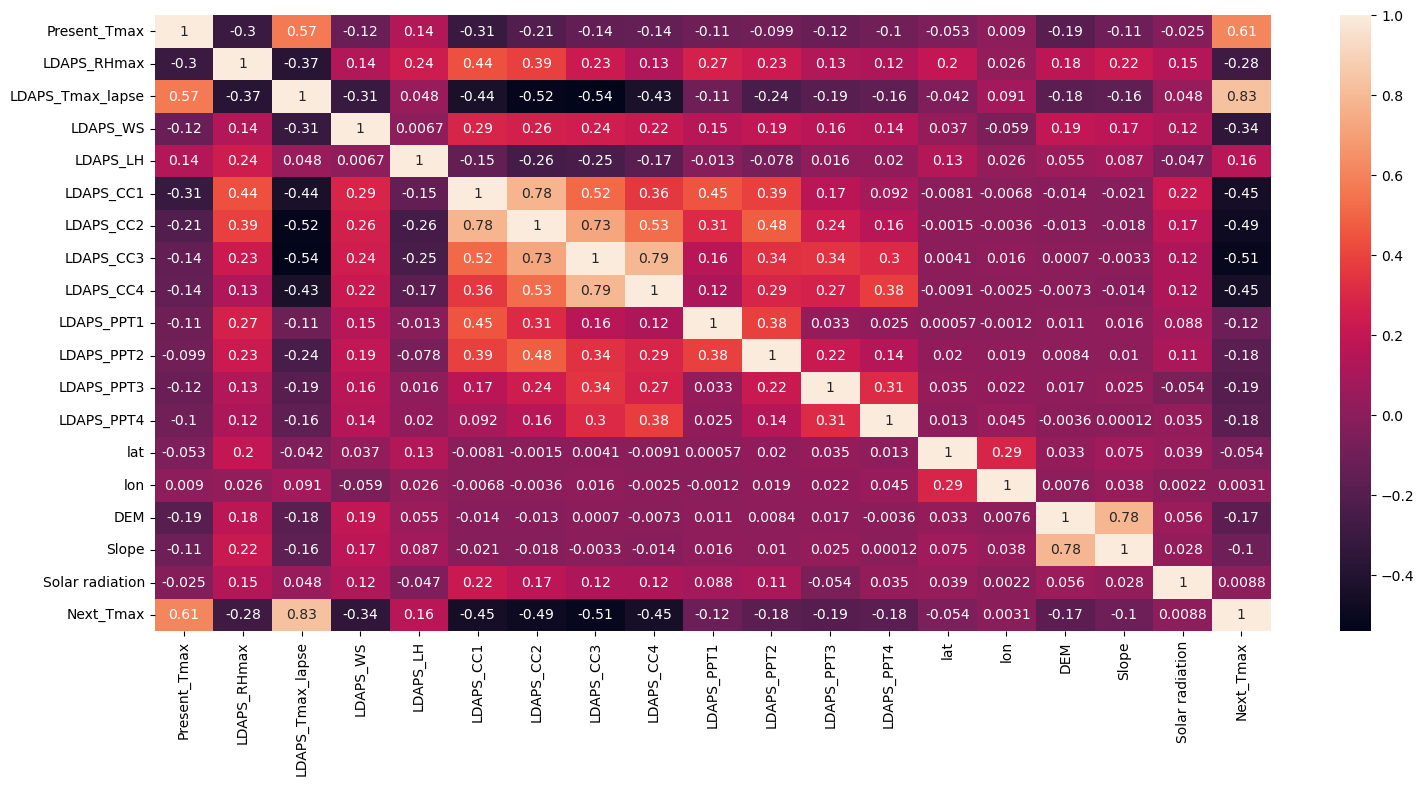

In [236]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'LDAPS_CC3' v/s 'Next_Tmax' is -0.51 and 'LDAPS_CC4' v/s 
               'Next_Tmin' is -0.45 from this heatmap 
                we get to know 'LDAPS_CC4' is contributing more to 'Next_Tmax' than 'LDAPS_CC3'. 
                so we can remove 'LDAPS_CC3' feature.

In [237]:
max_temperature_df.drop(columns = ['LDAPS_CC3'], axis = 1, inplace = True)
max_temperature_df

Date  Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse   LDAPS_WS  \
0    2013-06-30          28.7    91.116364         28.074101   6.818887   
1    2013-06-30          31.9    90.604721         29.850689   5.691890   
2    2013-06-30          31.6    83.973587         30.091292   6.138224   
3    2013-06-30          32.0    96.483688         29.704629   5.650050   
4    2013-06-30          31.4    90.155128         29.113934   5.735004   
...         ...           ...          ...               ...        ...   
7747 2017-08-30          23.3    78.869858         26.352081   6.148918   
7748 2017-08-30          23.3    77.294975         27.010193   6.542819   
7749 2017-08-30          23.2    77.243744         27.939516   7.289264   
7750 2013-07-01          20.0    58.936283         17.624954   2.882580   
7751 2013-07-01          37.6   100.000153         38.542255  21.857621   

        LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      69.451805   0.233947   0.203896   0.130928    0.000000    0.000000   
1      51.937448   0.225508   0.251771   0.127727    0.000000    0.000000   
2      20.573050   0.209344   0.257469   0.142125    0.000000    0.000000   
3      65.727144   0.216372   0.226002   0.134249    0.000000    0.000000   
4     107.965535   0.151407   0.249995   0.170021    0.000000    0.000000   
...          ...        ...        ...        ...         ...         ...   
7747   72.058294   0.030034   0.081035   0.000000    0.000000    0.000000   
7748   47.241457   0.035874   0.074962   0.000000    0.000000    0.000000   
7749    9.090034   0.048954   0.059869   0.000796    0.000000    0.000000   
7750  -13.603212   0.000000   0.000000   0.000000    0.000000    0.000000   
7751  213.414006   0.967277   0.968353   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  
0         5992.895996       29.1  
1         5869.312500       30.5  
2         5863.555664       31.1  
3         5856.964844       31.7  
4         5859.552246       31.2  
...               ...        ...  
7747      4443.313965       28.3  
7748      4438.373535       28.6  
7749      4451.345215       27.8  
7750      4329.520508       17.4  
7751      5992.895996       38.9  

[7752 rows x 19 columns]

In [238]:
max_temperature_df.shape

(7752, 19)

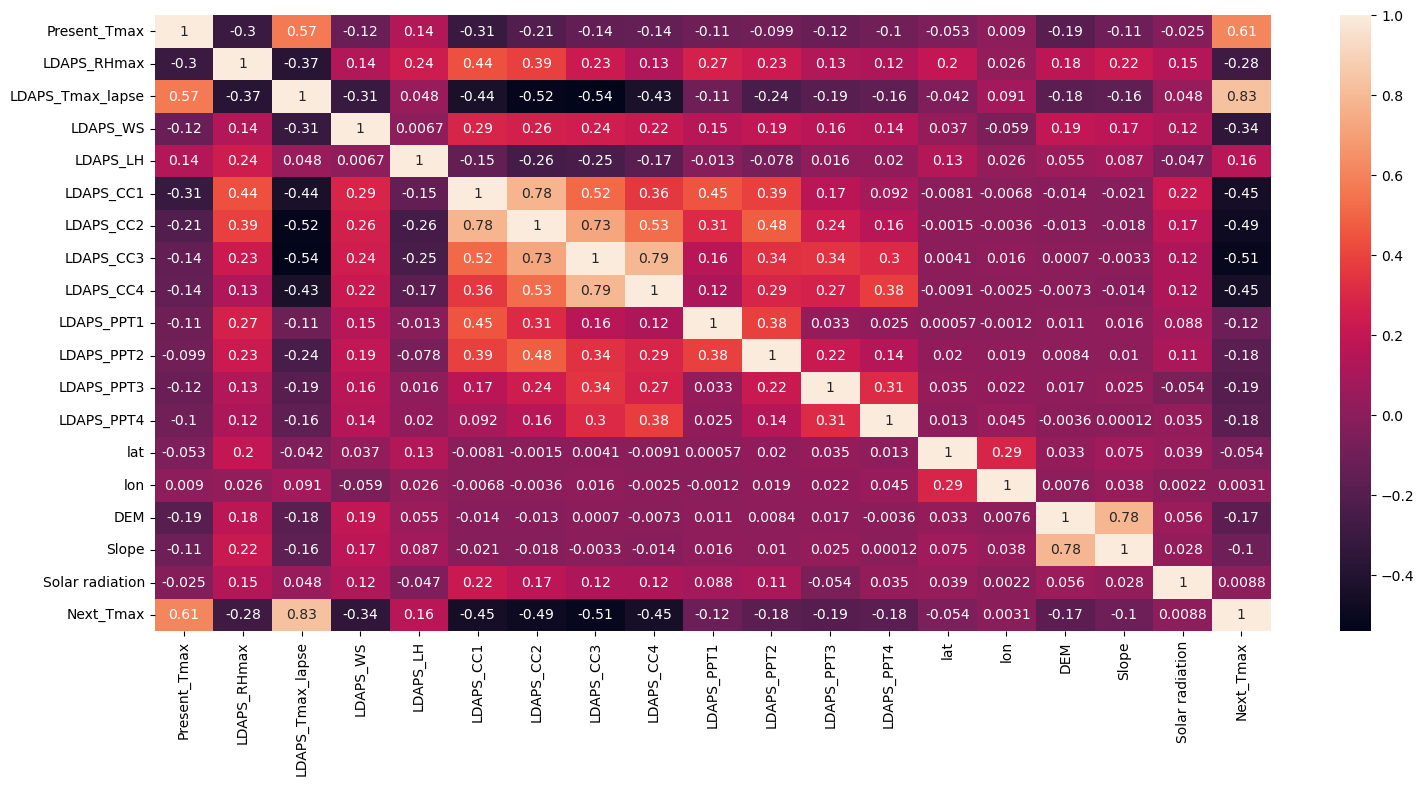

In [239]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s feature - 'LDAPS_CC1' v/s 'LDAPS_CC2' has more positive correlation 0.78
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

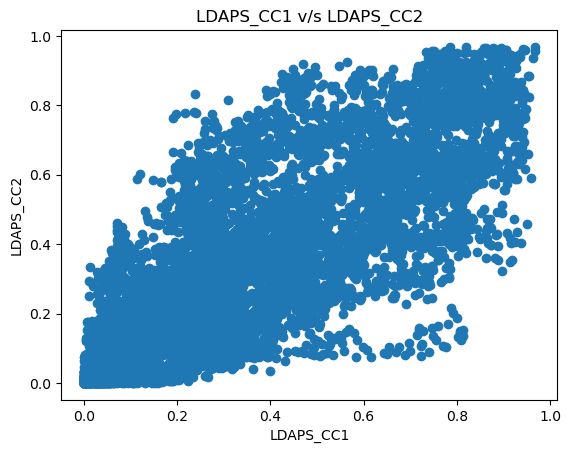

In [240]:
# one more proof so will plot scatter plot and check

plt.scatter(max_temperature_df['LDAPS_CC1'], max_temperature_df.LDAPS_CC2)
plt.xlabel("LDAPS_CC1")
plt.ylabel("LDAPS_CC2")
plt.title("LDAPS_CC1 v/s LDAPS_CC2")
plt.show()

Observation:
            1. feature v/s feature - 'LDAPS_CC1' v/s 'LDAPS_CC2' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'LDAPS_CC1' increases 'LDAPS_CC2' value increases - positive correlation

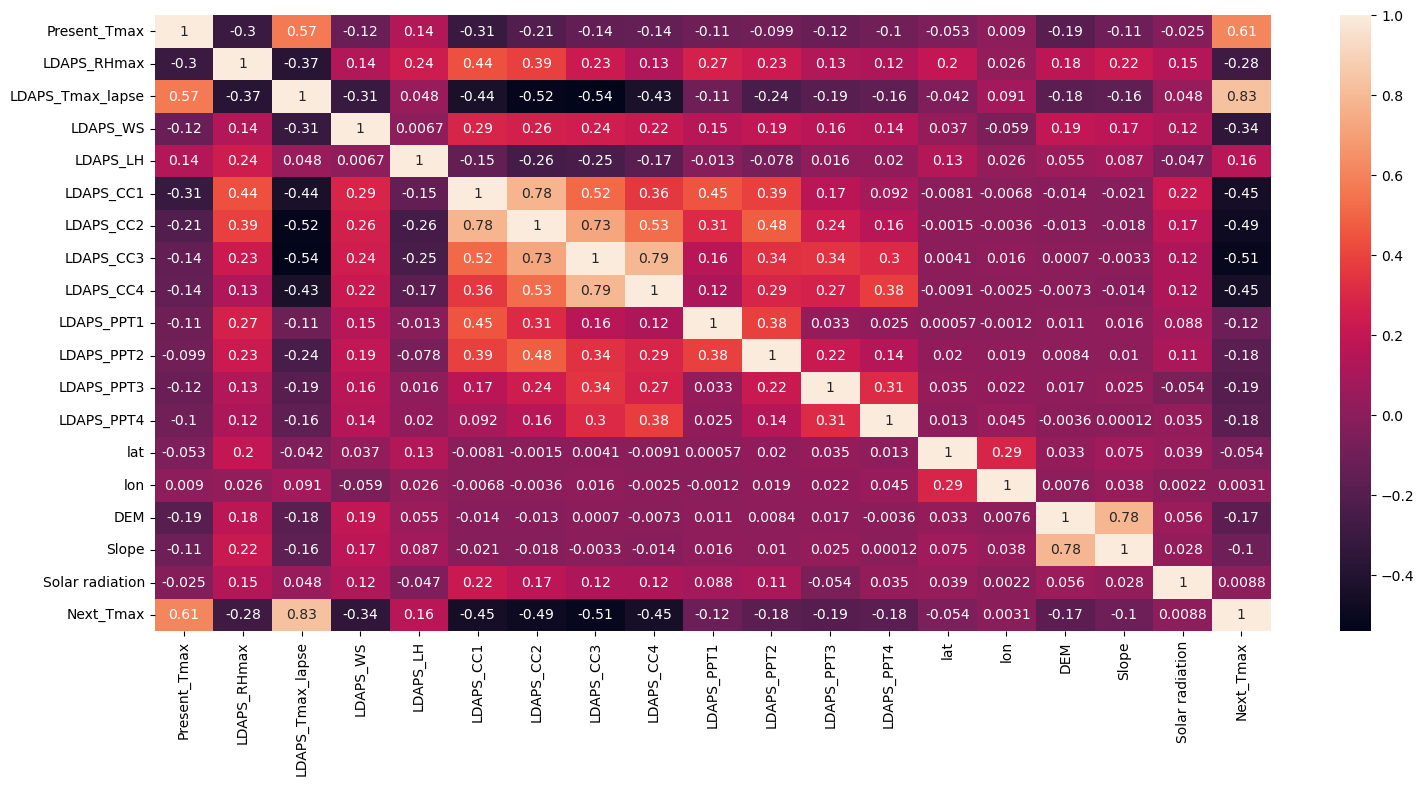

In [241]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s label - 'LDAPS_CC1' v/s 'Next_Tmax' is -0.45 and 'LDAPS_CC2' v/s 
               'Next_Tmax' is -0.49 from this heatmap 
              Ignore it.

In [242]:
max_temperature_df.shape

(7752, 19)

## Seperating features and target

In [243]:
max_temperature_df.columns

Index(['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [244]:
x1 = max_temperature_df.drop(['Date', 'Next_Tmax'], axis = 1) 
y1 = max_temperature_df['Next_Tmax']

In [246]:
x1.shape

(7752, 17)

In [247]:
y1.shape

(7752,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [248]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-0.36132577,  0.38307796, -0.52488856, ...,  2.77224286,
         1.11500407,  1.51793488],
       [ 0.72108401,  0.31158619,  0.08089519, ..., -0.31515742,
        -0.54215762,  1.22994952],
       [ 0.61960809, -0.61498177,  0.16293647, ..., -0.52621832,
        -0.7231326 ,  1.21653443],
       ...,
       [-2.22171758, -1.55534234, -0.57077984, ..., -0.77904331,
        -0.71933797, -2.0743251 ],
       [-3.30412736, -4.11344274, -4.08785706, ..., -0.91196325,
        -0.8454552 , -2.35821196],
       [ 2.64912642,  1.62440928,  3.04456067, ...,  2.77224286,
         2.86143459,  1.51793488]])

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x1.columns
vif

VIF Values          Features
0     1.832742      Present_Tmax
1     1.754381       LDAPS_RHmax
2     2.537362  LDAPS_Tmax_lapse
3     1.250760          LDAPS_WS
4     1.382657          LDAPS_LH
5     3.364798         LDAPS_CC1
6     4.209711         LDAPS_CC2
7     1.749896         LDAPS_CC4
8     1.417123        LDAPS_PPT1
9     1.460134        LDAPS_PPT2
10    1.217872        LDAPS_PPT3
11    1.270063        LDAPS_PPT4
12    1.162712               lat
13    1.124543               lon
14    2.721653               DEM
15    2.720188             Slope
16    1.152868   Solar radiation

Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value. 
               so there is no multicollinearity problem. 

In [250]:
max_temperature_df.shape

(7752, 19)

## Checking Outliers

In [251]:
max_temperature_df.columns

Index(['Date', 'Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [252]:
# we dont check outliers for labels - so remove the label

max_temperature_df_features = max_temperature_df.drop(['Date', 'Next_Tmax'], axis = 1)

In [253]:
max_temperature_df_features.shape

(7752, 17)

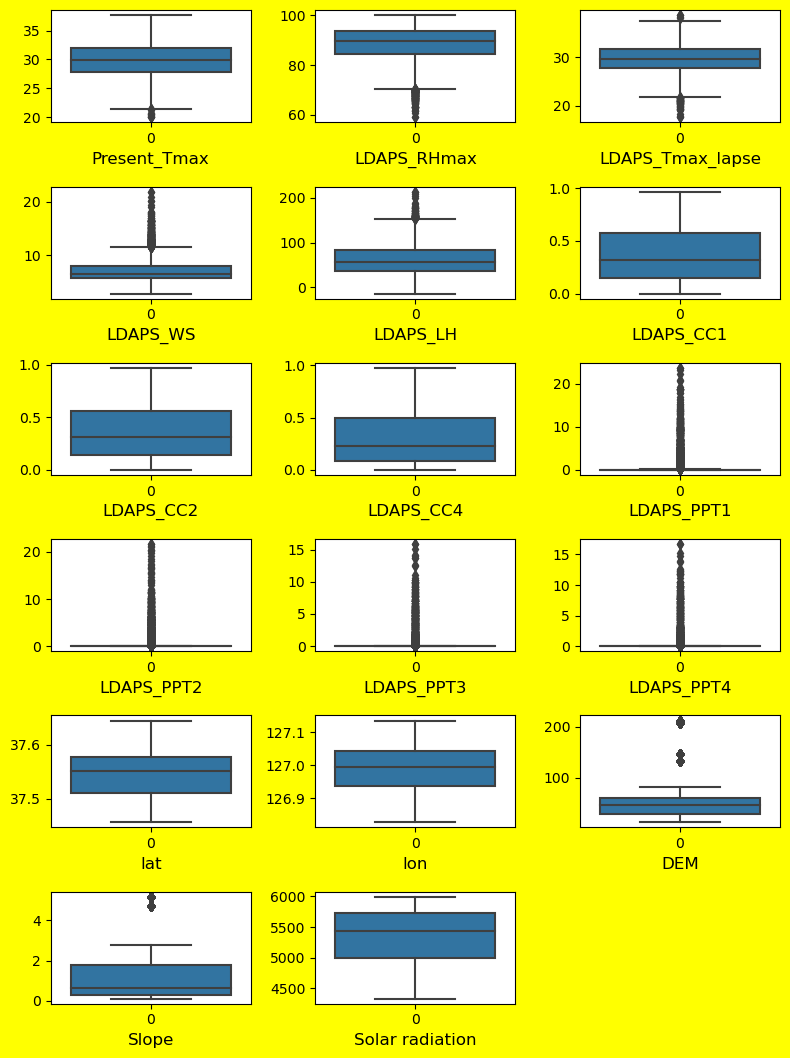

In [254]:
# Visualize the outliers using boxplot

plt.figure(figsize=(8,12), facecolor = 'yellow')
p = 1
for i in max_temperature_df_features:
    if p <= 20:
        ax = plt.subplot(7, 3, p)
        sns.boxplot(data = max_temperature_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observations:
            1. More Outliers found in features 
            2. This outliers are right skewed and left skewed (i.e. outliers are above max value and 
               below min value)

In [255]:
max_temperature_df_features.columns

Index(['Present_Tmax', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [256]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = max_temperature_df.quantile(0.25)
q3 = max_temperature_df.quantile(0.75)
iqr = q3 - q1

In [257]:
# validating one outlier

LDAPS_WS_high = (q3['LDAPS_WS'] + (1.5 * iqr['LDAPS_WS']))
LDAPS_WS_high

# anything > 11.488 outliers

11.488946982125

In [258]:
# check the index which have the higher values

np_index = np.where(max_temperature_df['LDAPS_WS'] > LDAPS_WS_high)
np_index

# remove these indexes as they are outliers

(array([  25,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
          38,   39,   40,   42,   43,   44,   45,   46,   47,   48,   49,
          69,   94,  175,  181,  183,  194,  219,  244,  258,  259,  269,
         275,  284,  294,  325,  334,  344,  369,  375,  378,  381,  382,
         383,  384,  386,  388,  389,  393,  394,  397,  398,  399,  400,
         409,  419,  469,  475,  494,  500,  519,  525,  544,  550,  559,
         569,  575,  576,  577,  579,  580,  581,  582,  583,  584,  585,
         586,  587,  588,  589,  590,  591,  592,  593,  594,  595,  596,
         597,  598,  599,  844,  950,  969,  994, 1175, 1194, 1219, 1475,
        1483, 1484, 1494, 1619, 2094, 2100, 2119, 2169, 2175, 2176, 2177,
        2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188,
        2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199,
        2350, 2353, 2361, 2363, 2364, 2368, 2369, 2370, 2372, 2373, 2374,
        2375, 2378, 2381, 2382, 2383, 

In [259]:
max_temperature_df.shape

(7752, 19)

In [260]:
max_temperature_df = max_temperature_df.drop(max_temperature_df.index[np_index])

In [261]:
max_temperature_df.shape  # 377 rows removed - outliers

(7375, 19)

In [262]:
max_temperature_df

Date  Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  \
0    2013-06-30          28.7    91.116364         28.074101  6.818887   
1    2013-06-30          31.9    90.604721         29.850689  5.691890   
2    2013-06-30          31.6    83.973587         30.091292  6.138224   
3    2013-06-30          32.0    96.483688         29.704629  5.650050   
4    2013-06-30          31.4    90.155128         29.113934  5.735004   
...         ...           ...          ...               ...       ...   
7746 2017-08-30          22.5    83.690018         26.704905  5.768083   
7747 2017-08-30          23.3    78.869858         26.352081  6.148918   
7748 2017-08-30          23.3    77.294975         27.010193  6.542819   
7749 2017-08-30          23.2    77.243744         27.939516  7.289264   
7750 2013-07-01          20.0    58.936283         17.624954  2.882580   

        LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      69.451805   0.233947   0.203896   0.130928         0.0         0.0   
1      51.937448   0.225508   0.251771   0.127727         0.0         0.0   
2      20.573050   0.209344   0.257469   0.142125         0.0         0.0   
3      65.727144   0.216372   0.226002   0.134249         0.0         0.0   
4     107.965535   0.151407   0.249995   0.170021         0.0         0.0   
...          ...        ...        ...        ...         ...         ...   
7746   82.146707   0.066461   0.024518   0.017678         0.0         0.0   
7747   72.058294   0.030034   0.081035   0.000000         0.0         0.0   
7748   47.241457   0.035874   0.074962   0.000000         0.0         0.0   
7749    9.090034   0.048954   0.059869   0.000796         0.0         0.0   
7750  -13.603212   0.000000   0.000000   0.000000         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0            0.0         0.0  37.6046  126.991  212.3350  2.785000   
1            0.0         0.0  37.6046  127.032   44.7624  0.514100   
2            0.0         0.0  37.5776  127.058   33.3068  0.266100   
3            0.0         0.0  37.6450  127.022   45.7160  2.534800   
4            0.0         0.0  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7746         0.0         0.0  37.5102  127.086   21.9668  0.133200   
7747         0.0         0.0  37.5372  126.891   15.5876  0.155400   
7748         0.0         0.0  37.5237  126.909   17.2956  0.222300   
7749         0.0         0.0  37.5237  126.970   19.5844  0.271300   
7750         0.0         0.0  37.4562  126.826   12.3700  0.098475   

      Solar radiation  Next_Tmax  
0         5992.895996       29.1  
1         5869.312500       30.5  
2         5863.555664       31.1  
3         5856.964844       31.7  
4         5859.552246       31.2  
...               ...        ...  
7746      4441.803711       28.0  
7747      4443.313965       28.3  
7748      4438.373535       28.6  
7749      4451.345215       27.8  
7750      4329.520508       17.4  

[7375 rows x 19 columns]

In [263]:
max_temperature_df.reset_index(inplace = True, drop = True)

In [264]:
max_temperature_df

Date  Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  \
0    2013-06-30          28.7    91.116364         28.074101  6.818887   
1    2013-06-30          31.9    90.604721         29.850689  5.691890   
2    2013-06-30          31.6    83.973587         30.091292  6.138224   
3    2013-06-30          32.0    96.483688         29.704629  5.650050   
4    2013-06-30          31.4    90.155128         29.113934  5.735004   
...         ...           ...          ...               ...       ...   
7370 2017-08-30          22.5    83.690018         26.704905  5.768083   
7371 2017-08-30          23.3    78.869858         26.352081  6.148918   
7372 2017-08-30          23.3    77.294975         27.010193  6.542819   
7373 2017-08-30          23.2    77.243744         27.939516  7.289264   
7374 2013-07-01          20.0    58.936283         17.624954  2.882580   

        LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      69.451805   0.233947   0.203896   0.130928         0.0         0.0   
1      51.937448   0.225508   0.251771   0.127727         0.0         0.0   
2      20.573050   0.209344   0.257469   0.142125         0.0         0.0   
3      65.727144   0.216372   0.226002   0.134249         0.0         0.0   
4     107.965535   0.151407   0.249995   0.170021         0.0         0.0   
...          ...        ...        ...        ...         ...         ...   
7370   82.146707   0.066461   0.024518   0.017678         0.0         0.0   
7371   72.058294   0.030034   0.081035   0.000000         0.0         0.0   
7372   47.241457   0.035874   0.074962   0.000000         0.0         0.0   
7373    9.090034   0.048954   0.059869   0.000796         0.0         0.0   
7374  -13.603212   0.000000   0.000000   0.000000         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0            0.0         0.0  37.6046  126.991  212.3350  2.785000   
1            0.0         0.0  37.6046  127.032   44.7624  0.514100   
2            0.0         0.0  37.5776  127.058   33.3068  0.266100   
3            0.0         0.0  37.6450  127.022   45.7160  2.534800   
4            0.0         0.0  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7370         0.0         0.0  37.5102  127.086   21.9668  0.133200   
7371         0.0         0.0  37.5372  126.891   15.5876  0.155400   
7372         0.0         0.0  37.5237  126.909   17.2956  0.222300   
7373         0.0         0.0  37.5237  126.970   19.5844  0.271300   
7374         0.0         0.0  37.4562  126.826   12.3700  0.098475   

      Solar radiation  Next_Tmax  
0         5992.895996       29.1  
1         5869.312500       30.5  
2         5863.555664       31.1  
3         5856.964844       31.7  
4         5859.552246       31.2  
...               ...        ...  
7370      4441.803711       28.0  
7371      4443.313965       28.3  
7372      4438.373535       28.6  
7373      4451.345215       27.8  
7374      4329.520508       17.4  

[7375 rows x 19 columns]

In [265]:
# validating another outlier

LDAPS_LH_high = (q3['LDAPS_LH'] + (1.5 * iqr['LDAPS_LH']))
LDAPS_LH_high

# anything > 153.462 outliers

153.4623182625

In [266]:
# check the index which have the higher values

np_index1 = np.where(max_temperature_df['LDAPS_LH'] > LDAPS_LH_high)
np_index1

# remove these indexes as they are outliers

(array([ 911, 1672, 1675, 1676, 1678, 1688, 1691, 1701, 2011, 2220, 2222,
        2270, 2282, 2344, 2357, 2366, 2367, 2931, 2933, 2943, 3031, 3231,
        3244, 3256, 3265, 3268, 3270, 3277, 3783, 3796, 4586, 4598, 4869,
        5266, 5329, 5331, 5556, 5706, 5780, 5804, 5853, 5974, 6002, 6165,
        6190, 6192, 6340, 6342, 6490, 6492, 6502, 6689, 6690, 6692, 6702,
        6717, 6742, 6790, 6792, 6802, 7230, 7246, 7304, 7306], dtype=int64),)

In [267]:
max_temperature_df.shape

(7375, 19)

In [268]:
max_temperature_df = max_temperature_df.drop(max_temperature_df.index[np_index1])

In [269]:
max_temperature_df.shape

(7311, 19)

In [270]:
max_temperature_df

Date  Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  \
0    2013-06-30          28.7    91.116364         28.074101  6.818887   
1    2013-06-30          31.9    90.604721         29.850689  5.691890   
2    2013-06-30          31.6    83.973587         30.091292  6.138224   
3    2013-06-30          32.0    96.483688         29.704629  5.650050   
4    2013-06-30          31.4    90.155128         29.113934  5.735004   
...         ...           ...          ...               ...       ...   
7370 2017-08-30          22.5    83.690018         26.704905  5.768083   
7371 2017-08-30          23.3    78.869858         26.352081  6.148918   
7372 2017-08-30          23.3    77.294975         27.010193  6.542819   
7373 2017-08-30          23.2    77.243744         27.939516  7.289264   
7374 2013-07-01          20.0    58.936283         17.624954  2.882580   

        LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      69.451805   0.233947   0.203896   0.130928         0.0         0.0   
1      51.937448   0.225508   0.251771   0.127727         0.0         0.0   
2      20.573050   0.209344   0.257469   0.142125         0.0         0.0   
3      65.727144   0.216372   0.226002   0.134249         0.0         0.0   
4     107.965535   0.151407   0.249995   0.170021         0.0         0.0   
...          ...        ...        ...        ...         ...         ...   
7370   82.146707   0.066461   0.024518   0.017678         0.0         0.0   
7371   72.058294   0.030034   0.081035   0.000000         0.0         0.0   
7372   47.241457   0.035874   0.074962   0.000000         0.0         0.0   
7373    9.090034   0.048954   0.059869   0.000796         0.0         0.0   
7374  -13.603212   0.000000   0.000000   0.000000         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0            0.0         0.0  37.6046  126.991  212.3350  2.785000   
1            0.0         0.0  37.6046  127.032   44.7624  0.514100   
2            0.0         0.0  37.5776  127.058   33.3068  0.266100   
3            0.0         0.0  37.6450  127.022   45.7160  2.534800   
4            0.0         0.0  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7370         0.0         0.0  37.5102  127.086   21.9668  0.133200   
7371         0.0         0.0  37.5372  126.891   15.5876  0.155400   
7372         0.0         0.0  37.5237  126.909   17.2956  0.222300   
7373         0.0         0.0  37.5237  126.970   19.5844  0.271300   
7374         0.0         0.0  37.4562  126.826   12.3700  0.098475   

      Solar radiation  Next_Tmax  
0         5992.895996       29.1  
1         5869.312500       30.5  
2         5863.555664       31.1  
3         5856.964844       31.7  
4         5859.552246       31.2  
...               ...        ...  
7370      4441.803711       28.0  
7371      4443.313965       28.3  
7372      4438.373535       28.6  
7373      4451.345215       27.8  
7374      4329.520508       17.4  

[7311 rows x 19 columns]

In [271]:
max_temperature_df.reset_index(inplace = True, drop = True)

In [272]:
max_temperature_df.shape

(7311, 19)

## Checking for Skewness

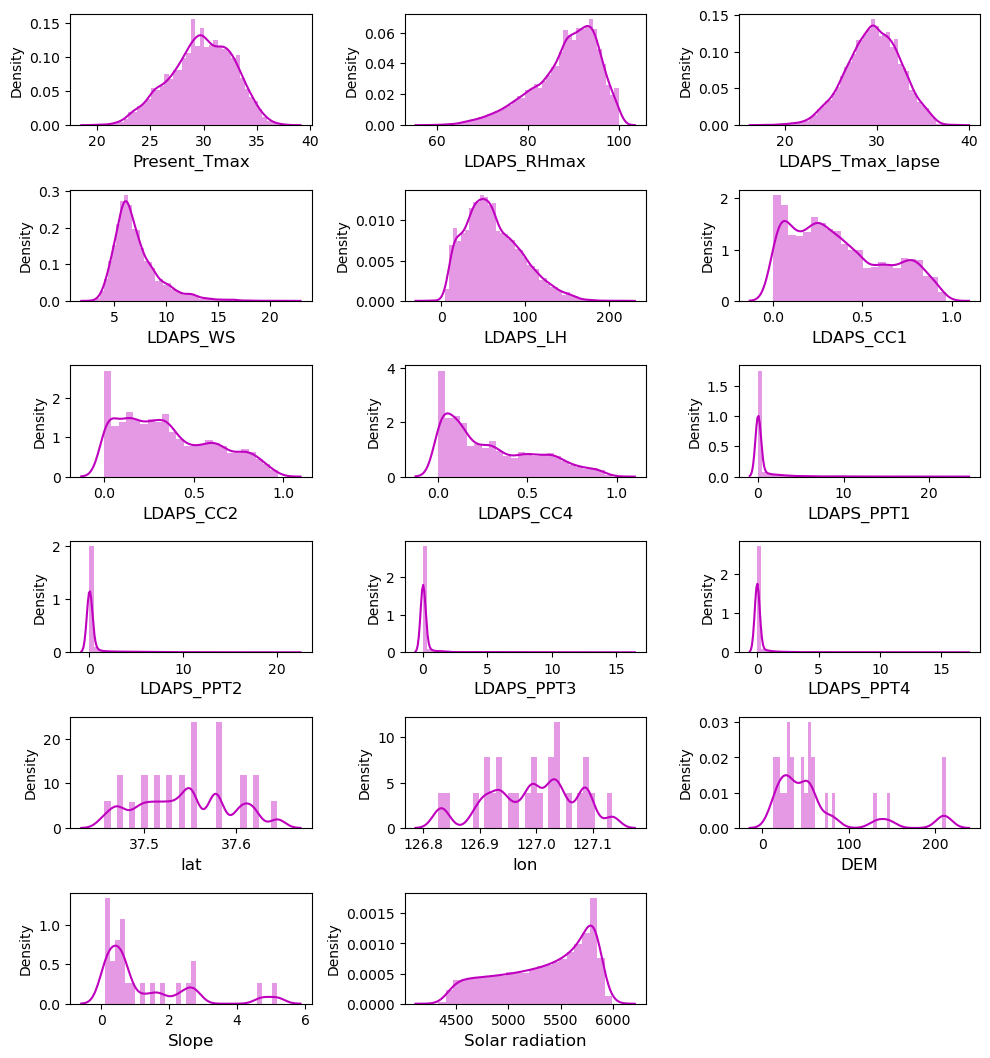

In [273]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in max_temperature_df_features:
    if p <= 20:
        ax = plt.subplot(7, 3, p)
        sns.distplot(max_temperature_df_features[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [274]:
max_temperature_df.skew() # not in the range -0.5 to +0.5

Present_Tmax       -0.276169
LDAPS_RHmax        -0.821604
LDAPS_Tmax_lapse   -0.132335
LDAPS_WS            0.677585
LDAPS_LH            0.551045
LDAPS_CC1           0.518577
LDAPS_CC2           0.488822
LDAPS_CC4           0.705209
LDAPS_PPT1          5.425963
LDAPS_PPT2          6.034698
LDAPS_PPT3          6.909461
LDAPS_PPT4          7.008930
lat                 0.108603
lon                -0.288848
DEM                 1.805902
Slope               1.624580
Solar radiation    -0.486926
Next_Tmax          -0.308191
dtype: float64

In [275]:
# removing for skewness

max_temperature_df['LDAPS_WS'] = np.cbrt(max_temperature_df['LDAPS_WS'])

max_temperature_df['LDAPS_CC4'] = np.cbrt(max_temperature_df['LDAPS_CC4'])

max_temperature_df['LDAPS_PPT1'] = np.cbrt(max_temperature_df['LDAPS_PPT1'])

max_temperature_df['LDAPS_PPT2'] = np.cbrt(max_temperature_df['LDAPS_PPT2'])

max_temperature_df['LDAPS_PPT3'] = np.cbrt(max_temperature_df['LDAPS_PPT3'])

max_temperature_df['LDAPS_PPT4'] = np.cbrt(max_temperature_df['LDAPS_PPT4'])

max_temperature_df['DEM'] = np.cbrt(max_temperature_df['DEM'])

max_temperature_df['Slope'] = np.cbrt(max_temperature_df['Slope'])

In [276]:
max_temperature_df.skew() # not in the range -0.5 to +0.5

Present_Tmax       -0.276169
LDAPS_RHmax        -0.821604
LDAPS_Tmax_lapse   -0.132335
LDAPS_WS            0.303105
LDAPS_LH            0.551045
LDAPS_CC1           0.518577
LDAPS_CC2           0.488822
LDAPS_CC4          -0.453783
LDAPS_PPT1          2.051517
LDAPS_PPT2          2.333813
LDAPS_PPT3          2.692626
LDAPS_PPT4          3.057962
lat                 0.108603
lon                -0.288848
DEM                 0.959009
Slope               0.633851
Solar radiation    -0.486926
Next_Tmax          -0.308191
dtype: float64

Observation:
            1. Some features - there are skewness.

## Modelling

In [277]:
max_temperature_df.shape

(7311, 19)

In [278]:
# setting Date as the DataFrame index

max_temperature_df.set_index('Date', inplace = True)

In [279]:
max_temperature_df.shape

(7311, 18)

In [280]:
x = max_temperature_df.drop(['Next_Tmax'], axis = 1) 
y = max_temperature_df['Next_Tmax']

In [281]:
x.shape

(7311, 17)

In [282]:
y.shape

(7311,)

In [283]:
# Feature Scaling using Standard Scalarization

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-0.37455396,  0.40670402, -0.59804885, ...,  2.39728652,
         1.31471635,  1.53800975],
       [ 0.72041249,  0.33464181,  0.03178788, ..., -0.12926687,
        -0.40907152,  1.24712413],
       [ 0.61775939, -0.59931928,  0.11708666, ..., -0.4777994 ,
        -0.85830608,  1.23357393],
       ...,
       [-2.22230986, -1.53996736, -0.97522619, ..., -1.13823873,
        -0.96479216, -2.12095967],
       [-2.25652756, -1.54718304, -0.64576227, ..., -1.02381324,
        -0.84646206, -2.09042748],
       [-3.35149402, -4.12569463, -4.30248702, ..., -1.42421556,
        -1.3744831 , -2.37717334]])

## HoldOut Validation Approach

In [284]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [285]:
x_train.shape

(5483, 17)

In [286]:
y_train.shape

(5483,)

In [287]:
x_test.shape

(1828, 17)

In [288]:
y_test.shape

(1828,)

## Linear Regression

## We select KFold cross validation

In [292]:
kfold = KFold(n_splits = 5, shuffle = True)

In [293]:
model_LR = LinearRegression()

In [294]:
LR_scores1 = cross_val_score(model_LR, x_train, y_train, cv = kfold, scoring = 'r2')
LR_scores1

array([0.7056191 , 0.71928764, 0.70783221, 0.75398289, 0.74543417])

In [295]:
print(np.mean(LR_scores1)) 

0.7264312048014764


In [296]:
model_LR.fit(x_train , y_train)

LinearRegression()

In [297]:
model_LR.score(x_test, y_test)

0.7368592441649467

In [298]:
y_pred = model_LR.predict(x_test)
y_pred

array([23.31641394, 31.58230914, 27.73896395, ..., 32.19220838,
       26.18778026, 30.40274379])

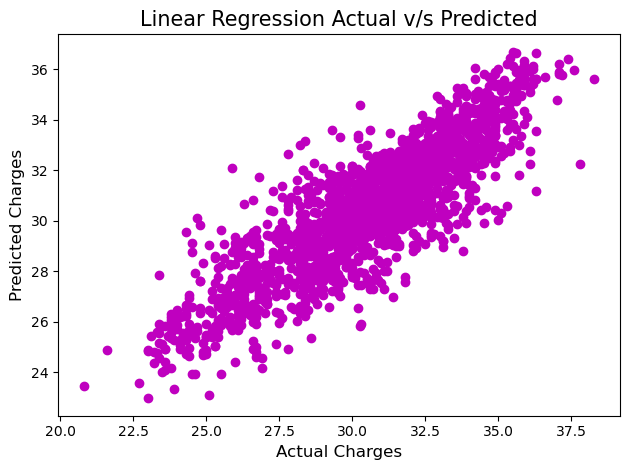

In [299]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

In [ ]:
Observation:
            1. Good number of samples are following linear curve

In [300]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  73.68592441649467
MAE  1.1760343561977076
MSE  2.315195285192828
RMSE  1.5215765788131823


Observation:
            1. Linear Regression model with kfold cross validation - 73.68%

## Random Forest Regression

In [301]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 348)

In [302]:
RFR = RandomForestRegressor()

In [303]:
kfold = KFold(n_splits = 5, shuffle = True)

In [304]:
RF_scores1 = cross_val_score(RFR, x_train1, y_train1, cv = kfold, scoring = 'r2')
RF_scores1

array([0.84913068, 0.87693393, 0.87370619, 0.88531581, 0.85933123])

In [305]:
print(np.mean(RF_scores1)) 

0.8688835672702917


In [306]:
RFR.fit(x_train1, y_train1)

RandomForestRegressor()

In [307]:
pred_RFR = RFR.predict(x_test1)
pred_RFR

array([34.123    , 25.06     , 31.484    , ..., 29.27     , 30.87     ,
       29.9612466])

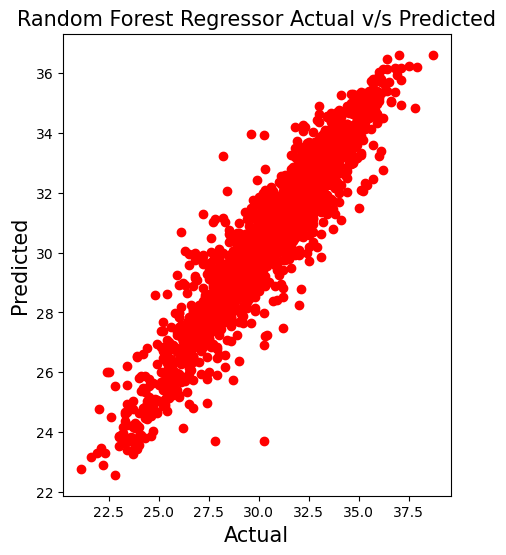

In [308]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test1, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. Good number of samples are following linear curve

In [309]:
print("r2_score on test data ", r2_score(y_test1, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test1, pred_RFR))

print("MSE ", mean_squared_error(y_test1, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, pred_RFR)))

r2_score on test data  88.07389843433631
MAE  0.7909376725230683
MSE  1.1314144995513489
RMSE  1.0636796978185439


Observation: 
            1. Random Forest Regressor model with KFold Cross Validation method - 88.07%

## KNN Regressor

In [310]:
kfold = KFold(n_splits = 5, shuffle = True)

In [312]:
knn = KNeighborsRegressor()

In [313]:
knn_scores1 = cross_val_score(knn, x_train, y_train, cv = kfold, scoring = 'r2')
knn_scores1

array([0.80503353, 0.83327798, 0.829437  , 0.8232211 , 0.82021185])

In [314]:
print(np.mean(knn_scores1))

0.8222362923032434


In [316]:
knn.fit(x_train , y_train)

KNeighborsRegressor()

In [317]:
knn.score(x_test, y_test)

0.8101578208637069

In [318]:
y_pred = knn.predict(x_test)
y_pred

array([23.52, 31.12, 27.78, ..., 30.98, 26.7 , 30.72])

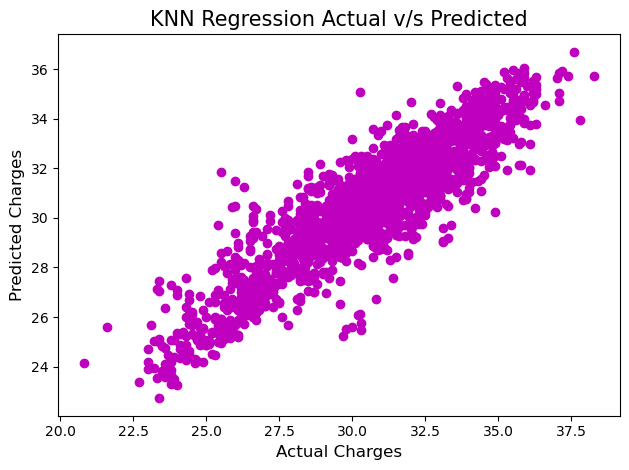

In [320]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('KNN Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

Observation:
            1. Good number of samples are following linear curve

In [321]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  81.01578208637069
MAE  0.9616548759675101
MSE  1.6702913110981077
RMSE  1.29239750506495


In [ ]:
Observation:
            1. KNN Regression model with kfold cross validation - 81.01%

## Ridge Regression

In [246]:
kfold = KFold(n_splits = 5, shuffle = True)

In [322]:
ridge = Ridge()

In [323]:
ridge_scores1 = cross_val_score(ridge, x_train, y_train, cv = kfold, scoring = 'r2')
ridge_scores1

array([0.74492268, 0.69538309, 0.75454778, 0.72403921, 0.71377464])

In [324]:
print(np.mean(ridge_scores1)) 

0.7265334813250122


In [325]:
ridge.fit(x_train , y_train)

Ridge()

In [326]:
ridge.score(x_test, y_test)

0.7368597657805398

In [327]:
y_pred = ridge.predict(x_test)
y_pred

array([23.31673945, 31.58229577, 27.73967317, ..., 32.19194252,
       26.18864076, 30.40282433])

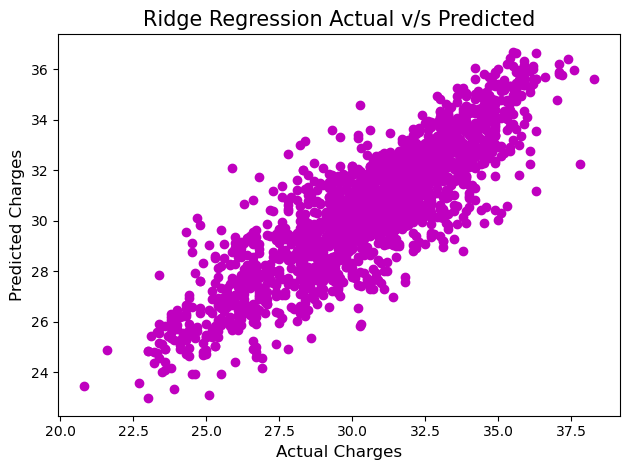

In [330]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('Ridge Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

Observation:
            1. Good number of samples are following linear curve

In [329]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  73.68597657805398
MAE  1.1760389823546011
MSE  2.3151906958544806
RMSE  1.5215750707258846


Observation:
            1. Ridge Regression model with kfold cross validation - 73.68%

In [ ]:
Observation:
            1. Linear Regression model with kfold cross validation - 73.68%
            2. Random Forest Regression model with kfold cross validation - 88.07%
            3. KNN Regression model with kfold cross validation - 81.01%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 73.68%
            5. Random Forest Regression model has more accuracy so we will hyper tune.

## HyperParameter Tuning for Random Forest Regressor model as its accuracy is better 88.07%

In [333]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [334]:
kf = KFold(n_splits = 5, shuffle = True)

In [335]:
grid_search = GridSearchCV(RFR, param_grid, scoring = 'r2', cv = kf)

In [336]:
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [337]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [338]:
RFR_hyper_model = grid_search.best_estimator_

## Retrain the model

In [339]:
RFR_hyper_model.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=200)

In [340]:
RFR_testing_acc = RFR_hyper_model.score(x_test1, y_test1)
RFR_testing_acc

0.8828459547752637

In [ ]:
Observation:
            1. Linear Regression model with kfold cross validation - 73.68%
            2. Random Forest Regression model with kfold cross validation - 88.07%
            3. KNN Regression model with kfold cross validation - 81.01%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 73.68%
            5. Random Forest Regression model with hyper parameter tuning - 88.28%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc - 88.28%

## Saving the model

In [341]:
import pickle
filename = "Maximum_Temperature_Forecast_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [342]:
# lets load the saved model and get the prediction

loaded_model2 = pickle.load(open('Maximum_Temperature_Forecast_Model.pkl', 'rb'))

In [343]:
loaded_model2.score(x_test1, y_test1)

0.8828459547752637

In [345]:
prediction1 = loaded_model2.predict(x_test1)
prediction1

array([34.093     , 25.0655    , 31.4125    , ..., 29.582     ,
       30.707     , 29.83574887])

In [346]:
# comparing the predicted and actual values

a = np.array(y_test1)
df1 = pd.DataFrame()
df1['Predicted'] = prediction1
df1['Original'] = a
df1

Predicted  Original
0     34.093000      34.1
1     25.065500      24.7
2     31.412500      32.2
3     33.172500      33.7
4     33.037500      33.1
...         ...       ...
1823  29.166374      31.0
1824  28.706500      28.4
1825  29.582000      27.4
1826  30.707000      30.2
1827  29.835749      29.3

[1828 rows x 2 columns]

Observation:
            1. Actual and predicted values almost matches
            2. This Maximum_Temperature_Forecast_Model.pkl can be used to predict the maximum 
               temperature for the next day - 'Next_Tmax'

In [ ]:
Observation:
            1. Linear Regression model with kfold cross validation - 73.68%
            2. Random Forest Regression model with kfold cross validation - 88.07%
            3. KNN Regression model with kfold cross validation - 81.01%
            4. Ridge Regressor model with KFold Cross Validation method - accuracy - 73.68%
            5. Random Forest Regression model with hyper parameter tuning - 88.28%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc - 88.28% and our model is not overfitted 

In [ ]:
Observation:
            1. To predict for the minimum temperature for the next day -Random Forest Regressor model 
                with hyper parameter tuning for prediction - 89.01%
            2. To predict for the maximum temperature for the next day - Random Forest Regression model 
                with hyper parameter tuning - 88.28%               